# Air Quality Index Prediction and EDA

 ## 1. Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Read and investigate data

In [2]:
# read the csv file
data = pd.read_csv('station_hour.csv', low_memory=False).sort_values(by = ['Datetime', 'StationId'])
df = data.copy()

Let's look at the data

In [3]:
df.describe()

PM2.5          PM10            NO           NO2           NOx   
count  1.941394e+06  1.469831e+06  2.035372e+06  2.060110e+06  2.098275e+06  \
mean   8.086481e+01  1.584839e+02  2.278825e+01  3.523689e+01  4.055115e+01   
std    8.947618e+01  1.397883e+02  4.846146e+01  3.497508e+01  5.590894e+01   
min    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  0.000000e+00   
25%    2.816000e+01  6.400000e+01  3.050000e+00  1.310000e+01  1.135000e+01   
50%    5.259000e+01  1.162500e+02  7.150000e+00  2.479000e+01  2.286000e+01   
75%    9.774000e+01  2.040000e+02  1.858000e+01  4.548000e+01  4.570000e+01   
max    1.000000e+03  1.000000e+03  5.000000e+02  4.999900e+02  5.000000e+02   

                NH3            CO           SO2            O3       Benzene   
count  1.352465e+06  2.089781e+06  1.846346e+06  1.863110e+06  1.727504e+06  \
mean   2.870856e+01  1.502366e+00  1.211602e+01  3.806408e+01  3.305493e+00   
std    2.753244e+01  6.292445e+00  1.467385e+01  4.710653e+01  1.214053e+01   
min    1.000000e-02  0.000000e+00  1.000000e-02  1.000000e-02  0.000000e+00   
25%    1.123000e+01  4.100000e-01  4.250000e+00  1.102000e+01  8.000000e-02   
50%    2.235000e+01  8.000000e-01  8.250000e+00  2.475000e+01  9.600000e-01   
75%    3.778000e+01  1.380000e+00  1.453000e+01  4.953000e+01  3.230000e+00   
max    4.999700e+02  4.985700e+02  1.999600e+02  9.970000e+02  4.980700e+02   

            Toluene         Xylene           AQI  
count  1.546717e+06  513979.000000  2.018893e+06  
mean   1.490266e+01       2.448881  1.801730e+02  
std    3.329729e+01       8.973470  1.404095e+02  
min    0.000000e+00       0.000000  5.000000e+00  
25%    3.400000e-01       0.000000  8.400000e+01  
50%    3.400000e+00       0.200000  1.310000e+02  
75%    1.510000e+01       1.830000  2.590000e+02  
max    4.999900e+02     499.990000  3.133000e+03

From the description of the AQI in kaggle, the maximum value of AQI is 1000. We can see that there are outliers in the data.  

In [4]:
df.drop(df[df.AQI > 2000].index, inplace=True)
df.describe()

PM2.5          PM10            NO           NO2           NOx   
count  1.940655e+06  1.469757e+06  2.034660e+06  2.059398e+06  2.097558e+06  \
mean   8.083825e+01  1.584790e+02  2.274611e+01  3.520742e+01  4.051147e+01   
std    8.946921e+01  1.397880e+02  4.833616e+01  3.491630e+01  5.582789e+01   
min    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  0.000000e+00   
25%    2.814000e+01  6.400000e+01  3.050000e+00  1.310000e+01  1.135000e+01   
50%    5.255000e+01  1.162500e+02  7.150000e+00  2.478000e+01  2.285000e+01   
75%    9.765000e+01  2.040000e+02  1.857000e+01  4.546000e+01  4.568000e+01   
max    1.000000e+03  1.000000e+03  5.000000e+02  4.999900e+02  5.000000e+02   

                NH3            CO           SO2            O3       Benzene   
count  1.352465e+06  2.089069e+06  1.845770e+06  1.862441e+06  1.726758e+06  \
mean   2.870856e+01  1.454063e+00  1.209398e+01  3.807174e+01  3.299796e+00   
std    2.753244e+01  5.009260e+00  1.459784e+01  4.711208e+01  1.212756e+01   
min    1.000000e-02  0.000000e+00  1.000000e-02  1.000000e-02  0.000000e+00   
25%    1.123000e+01  4.100000e-01  4.250000e+00  1.102000e+01  8.000000e-02   
50%    2.235000e+01  8.000000e-01  8.250000e+00  2.476000e+01  9.600000e-01   
75%    3.778000e+01  1.380000e+00  1.452000e+01  4.955000e+01  3.230000e+00   
max    4.999700e+02  3.880400e+02  1.999600e+02  9.970000e+02  4.980700e+02   

            Toluene         Xylene           AQI  
count  1.545971e+06  513233.000000  2.018145e+06  
mean   1.488027e+01       2.429661  1.793164e+02  
std    3.324187e+01       8.920676  1.330527e+02  
min    0.000000e+00       0.000000  5.000000e+00  
25%    3.400000e-01       0.000000  8.400000e+01  
50%    3.400000e+00       0.200000  1.310000e+02  
75%    1.507000e+01       1.820000  2.590000e+02  
max    4.999900e+02     499.990000  1.995000e+03

Convert Datetime into pandas datetime format. 

In [5]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [6]:
print('Date starts from {}, and ends in {}'.format(df.Datetime.min().strftime('%Y-%m-%d'), df.Datetime.max().strftime('%Y-%m-%d')))

Date starts from 2015-01-01, and ends in 2020-07-01


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2588335 entries, 285144 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype         
---  ------      -----         
 0   StationId   object        
 1   Datetime    datetime64[ns]
 2   PM2.5       float64       
 3   PM10        float64       
 4   NO          float64       
 5   NO2         float64       
 6   NOx         float64       
 7   NH3         float64       
 8   CO          float64       
 9   SO2         float64       
 10  O3          float64       
 11  Benzene     float64       
 12  Toluene     float64       
 13  Xylene      float64       
 14  AQI         float64       
 15  AQI_Bucket  object        
dtypes: datetime64[ns](1), float64(13), object(2)
memory usage: 335.7+ MB


In [8]:
most_polluted = df[['StationId', 'AQI', 'PM10', 'CO']].groupby(['StationId']).mean().sort_values(by = 'AQI', ascending = False).head(5)
most_polluted

AQI        PM10         CO
StationId                                   
GJ001      403.022040  110.277859  19.202024
DL002      357.571361  351.845107   2.207099
DL028      294.138557  124.616304   1.411248
DL038      272.805198  277.390071   1.521695
DL020      270.627499  268.872021   1.366256

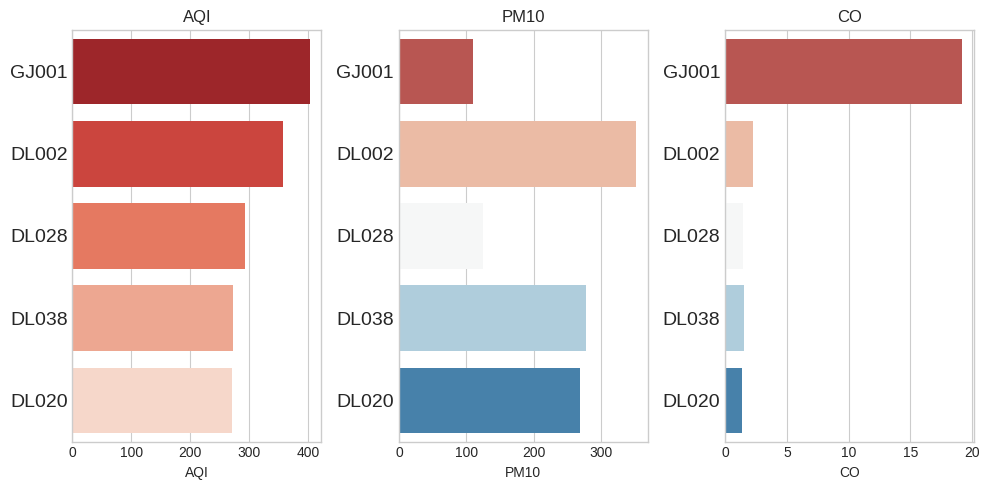

In [9]:
plt.style.use('seaborn-whitegrid')
f, ax_ = plt.subplots(1, 3, figsize = (10,5))

bar1 = sns.barplot(x = most_polluted.AQI,
                   y = most_polluted.index,
                   palette = 'Reds_r',
                   ax = ax_[0]);

bar1 = sns.barplot(x = most_polluted.PM10,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[1]);

bar1 = sns.barplot(x = most_polluted.CO,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[2]);

titles = ['AQI', 'PM10', 'CO']
for i in range(3) :
    ax_[i].set_ylabel('')   
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 14);
    ax_[i].set_title(titles[i])
    f.tight_layout()

In [10]:
Cor = df.corr(numeric_only = True).AQI.sort_values(ascending = False)
Cor

AQI        1.000000
PM10       0.762524
PM2.5      0.690847
NO2        0.408748
NH3        0.389390
NOx        0.372268
CO         0.364683
NO         0.321483
SO2        0.299325
Toluene    0.261178
O3         0.142606
Benzene    0.106514
Xylene     0.092433
Name: AQI, dtype: float64

## 2. Handing missing Values

We can see there are missig (NaN) values from the above table. To see the percentage of missing values for each column, we use the following function.

In [11]:
print(df.isnull().sum())

StationId           0
Datetime            0
PM2.5          647680
PM10          1118578
NO             553675
NO2            528937
NOx            490777
NH3           1235870
CO             499266
SO2            742565
O3             725894
Benzene        861577
Toluene       1042364
Xylene        2075102
AQI            570190
AQI_Bucket     570190
dtype: int64


In [12]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
missing_values= missing_values_table(df)
missing_values

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


Missing Values  % of Total Values
Xylene             2075102               80.2
NH3                1235870               47.7
PM10               1118578               43.2
Toluene            1042364               40.3
Benzene             861577               33.3
SO2                 742565               28.7
O3                  725894               28.0
PM2.5               647680               25.0
AQI                 570190               22.0
AQI_Bucket          570190               22.0
NO                  553675               21.4
NO2                 528937               20.4
CO                  499266               19.3
NOx                 490777               19.0

We can see that 80% and close to 50% of data is missing for Xylene and NH3 respectively. If the majority of data is missing, usually it is safe to drop the column all together.

To hanlde missing values for the other columns, we can use:
 - with mean, median and mode imputation
 - with forward and backward filling
 - linear interpolation

### 2.1. Mean, median and mode imputation

Let's use SimpleImputer from sklearn:

In [14]:
df = df.set_index('Datetime').sort_values(by = 'Datetime')

In [15]:
from sklearn.impute import SimpleImputer

for method in ["mean", "median", "most_frequent"]:
    df[method] = SimpleImputer(strategy=method).fit_transform(
        df["NH3"].values.reshape(-1, 1)
    )

This will calculate mean, median and mode for column NH3 to fill the missing values.

### 2.2. Forward and Backward filling

Still for the same NH3 column, we can fill nan values:

In [16]:
# fill NaN of NH3 column with forward and backward fill
df["ffill"] = df["NH3"].ffill()
df["bfill"] = df["NH3"].bfill()

### 2.3. Linear interpolation

Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

In [17]:
# interpolate for NH3 column
df["interpolated"] = df["NH3"].interpolate(limit_direction="both")

We will use the following function to plot the original distribution before and after an imputation(s) is performed:

In [18]:
def compare_dists(original_dist, imputed_dists: dict):
    """
    Plot original_dist and imputed_dists on top of each other
    to see the difference in distributions.
    """
    fig, ax = plt.subplots(figsize=(12, 7), dpi=140)
    # Plot the original
    sns.kdeplot(
        original_dist, linewidth=3, ax=ax, color="black", label="Original dist."
    )
    for key, value in imputed_dists.items():
        sns.kdeplot(value, linewidth=1, label=key, ax=ax)

    plt.legend()
    plt.show();

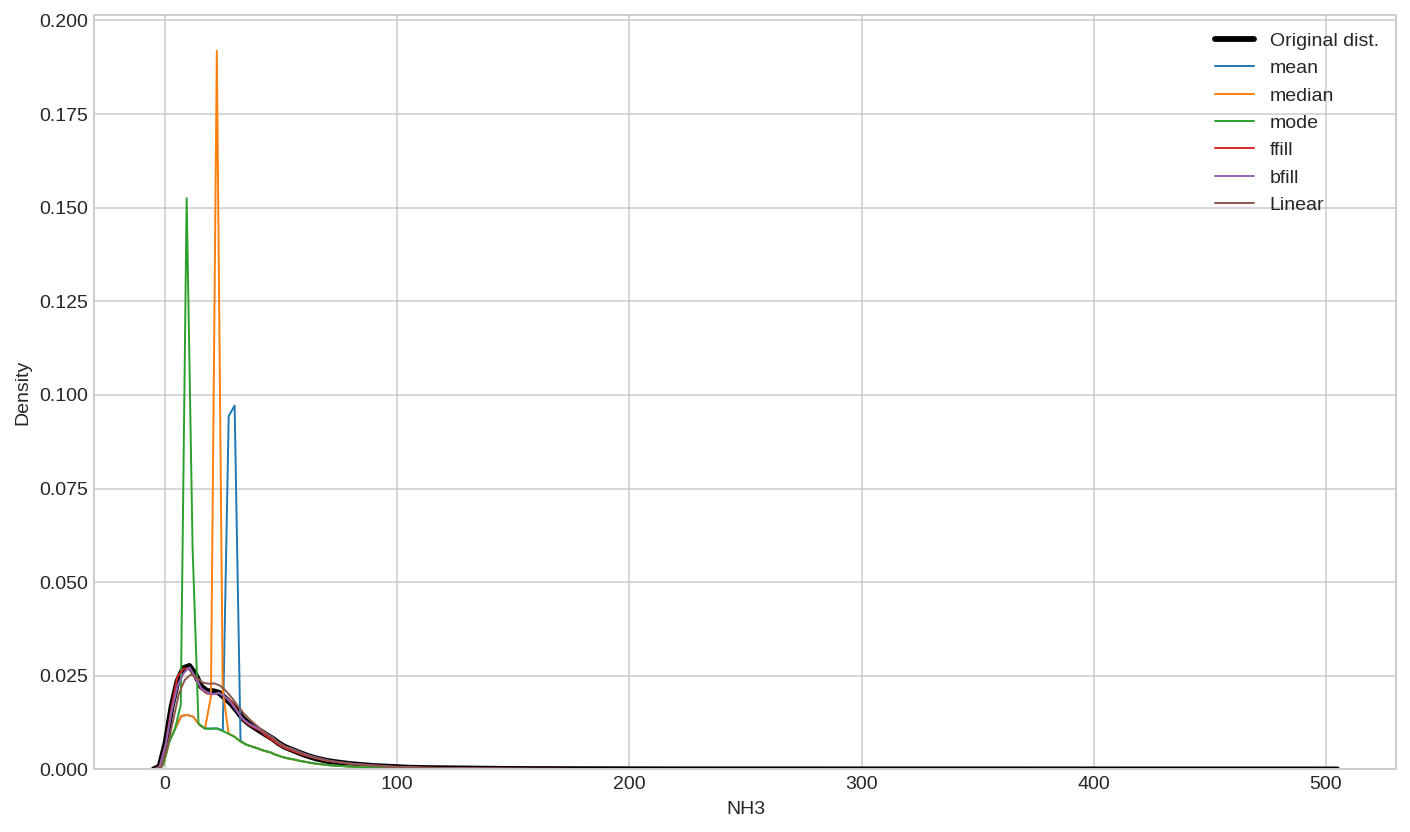

In [19]:
compare_dists(
    df["NH3"],
    {"mean": df["mean"], "median": df["median"], "mode": df["most_frequent"], "ffill":df["ffill"], 
     "bfill":df["bfill"], "Linear":df["interpolated"]},)

We can see that forward filling, backward filling and Linear interpolation provide a plot close to the original distribution, as is the case for time series data. We can repeat the same for the other colums to decide which method to use. 

Let's drop mean, median and mode and repeat the plot for visiblity.

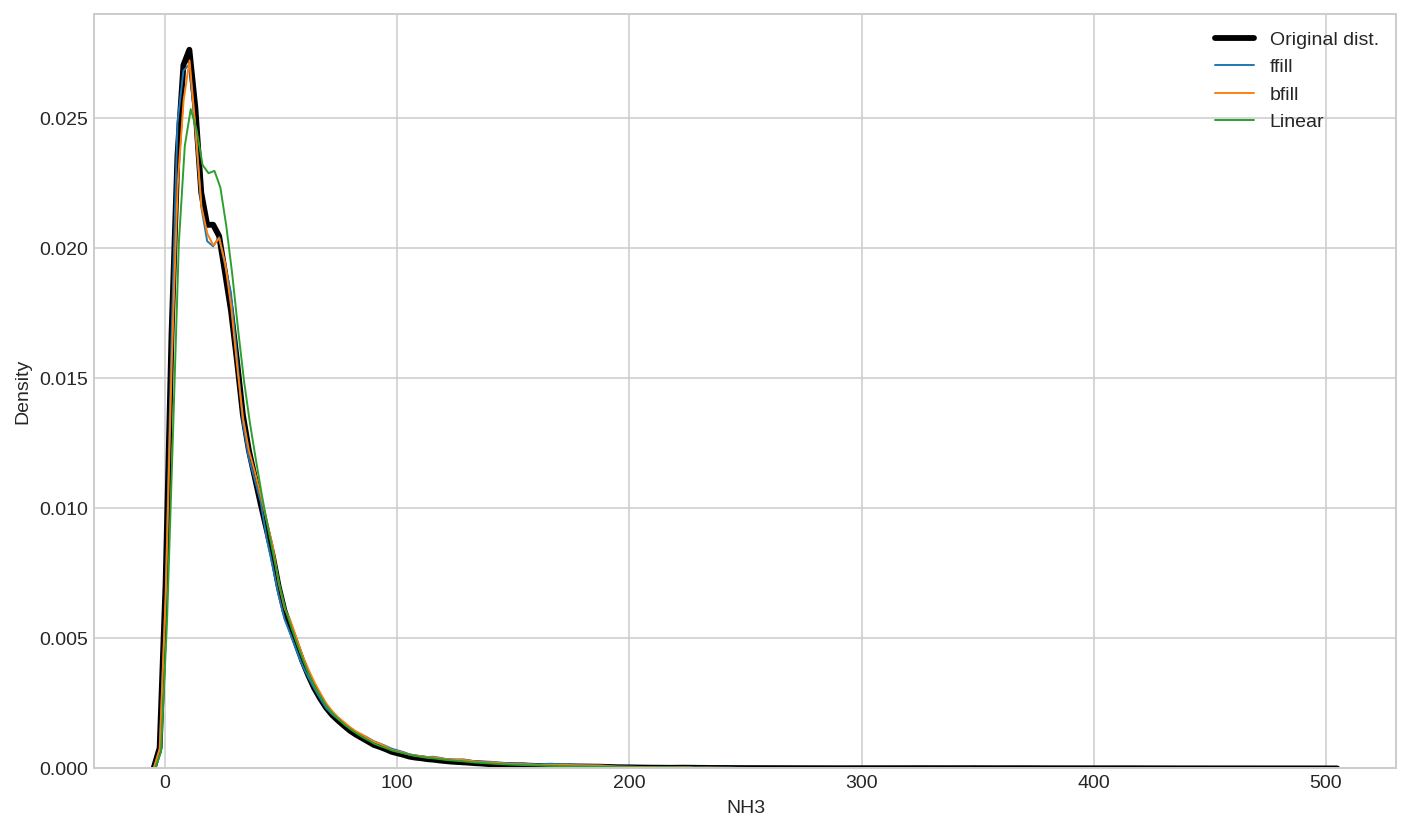

In [20]:
df.drop(["mean", "median", "most_frequent"], axis=1, inplace=True)
compare_dists(
    df["NH3"],
    {"ffill":df["ffill"], "bfill":df["bfill"], "Linear":df["interpolated"]},)

For NH3 linear interpolation appears closer to the original disttribution. 

#### Repeat for PM10

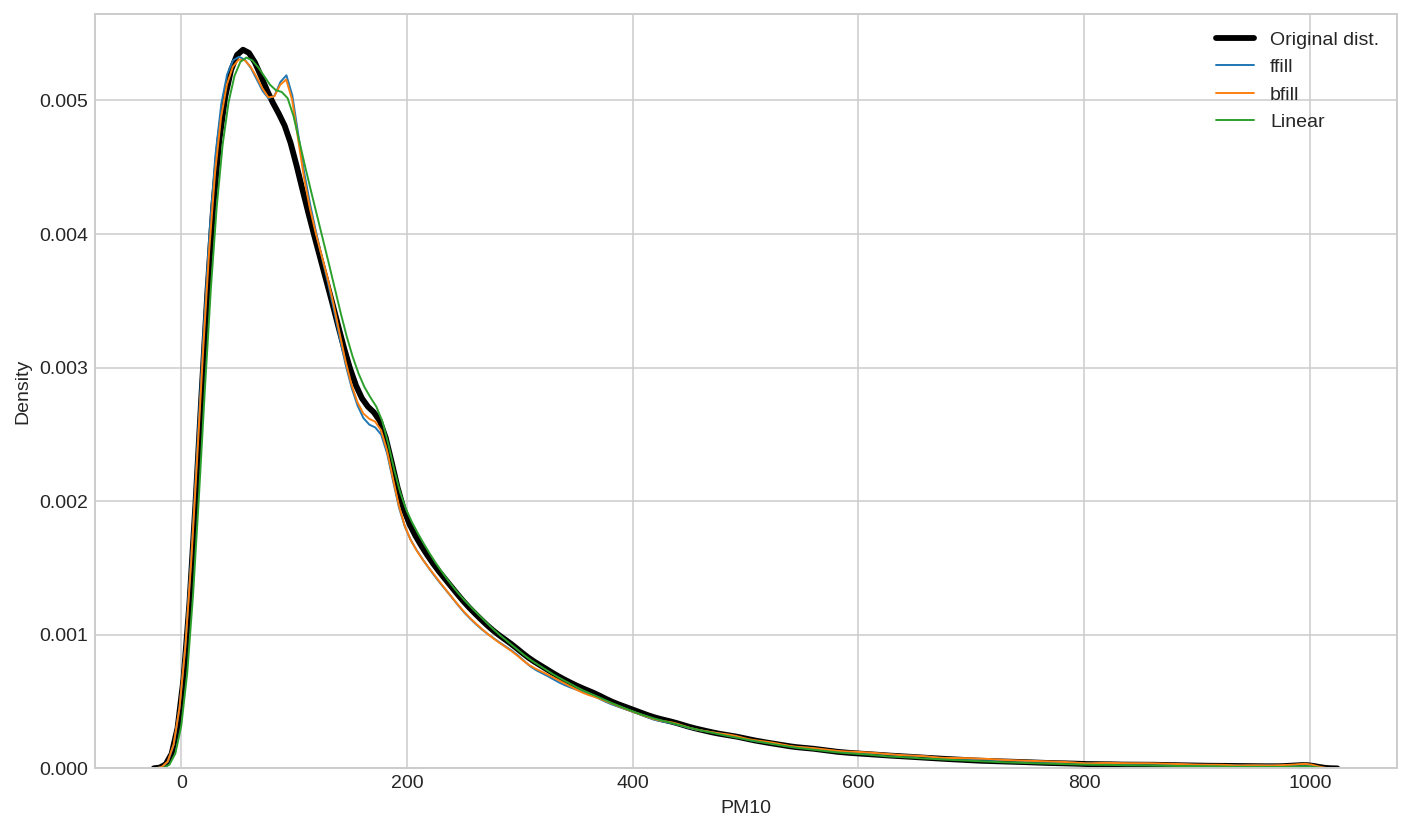

In [21]:
# fill NaN of PM10 column with forward and backward fill
df["PM10_ffill"] = df["PM10"].ffill()
df["PM10_bfill"] = df["PM10"].bfill()

# interpolate for PM10 column
df["PM10_interpolated"] = df["PM10"].interpolate(limit_direction="both")


compare_dists(
    df["PM10"],
    {"ffill":df["PM10_ffill"], "bfill":df["PM10_bfill"], "Linear":df["PM10_interpolated"]},)

Therefore, we will use interpolate for float variables and mode for categorical variables (AQI_Bucket).

In [22]:
cols = ['AQI', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene']
inter = df.loc[:, cols].interpolate(method = 'time', limit_direction="both");
df.loc[:, cols] = inter

From the explanation for AQI index calculation, we can use the following function to fill the missing values of AQI_Bucket.

In [23]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [24]:
df['AQI_Bucket'] = df['AQI'].apply(lambda x: get_AQI_bucket(x))

In [25]:
print(df.isnull().sum())

StationId            0
PM2.5                0
PM10                 0
NO                   0
NO2                  0
NOx                  0
NH3                  0
CO                   0
SO2                  0
O3                   0
Benzene              0
Toluene              0
Xylene               0
AQI                  0
AQI_Bucket           0
ffill                6
bfill                0
interpolated         0
PM10_ffill           0
PM10_bfill           0
PM10_interpolated    0
dtype: int64


In [26]:
df=df.drop(['ffill', 'bfill', 'interpolated', 'PM10_ffill','PM10_bfill','PM10_interpolated'], axis=1)

In [27]:
df.describe()

PM2.5          PM10            NO           NO2           NOx   
count  2.588335e+06  2.588335e+06  2.588335e+06  2.588335e+06  2.588335e+06  \
mean   7.760577e+01  1.528599e+02  2.050951e+01  3.373994e+01  3.826948e+01   
std    8.817502e+01  1.390620e+02  4.533896e+01  3.376234e+01  5.482315e+01   
min    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  0.000000e+00   
25%    2.700000e+01  6.200000e+01  2.920000e+00  1.244000e+01  1.011000e+01   
50%    5.004000e+01  1.110000e+02  6.720000e+00  2.365000e+01  2.118000e+01   
75%    9.210000e+01  1.910000e+02  1.580000e+01  4.336000e+01  4.255000e+01   
max    1.000000e+03  1.000000e+03  5.000000e+02  4.999900e+02  5.000000e+02   

                NH3            CO           SO2            O3       Benzene   
count  2.588335e+06  2.588335e+06  2.588335e+06  2.588335e+06  2.588335e+06  \
mean   2.870466e+01  1.441710e+00  1.103941e+01  3.737568e+01  3.021736e+00   
std    2.970915e+01  5.045092e+00  1.388665e+01  4.379118e+01  1.102463e+01   
min    1.000000e-02  0.000000e+00  1.000000e-02  1.000000e-02  0.000000e+00   
25%    1.128000e+01  3.700000e-01  3.840000e+00  1.147000e+01  0.000000e+00   
50%    2.162000e+01  7.700000e-01  7.300000e+00  2.512000e+01  7.500000e-01   
75%    3.620000e+01  1.330000e+00  1.312000e+01  4.907000e+01  2.900000e+00   
max    4.999700e+02  3.880400e+02  1.999600e+02  9.970000e+02  4.980700e+02   

            Toluene        Xylene           AQI  
count  2.588335e+06  2.588335e+06  2.588335e+06  
mean   1.201395e+01  2.276496e+00  1.734754e+02  
std    2.999623e+01  8.418396e+00  1.316627e+02  
min    0.000000e+00  0.000000e+00  5.000000e+00  
25%    1.200000e-01  0.000000e+00  8.000000e+01  
50%    2.310000e+00  2.300000e-01  1.240000e+02  
75%    1.045000e+01  1.800000e+00  2.470000e+02  
max    4.999900e+02  4.999900e+02  1.995000e+03

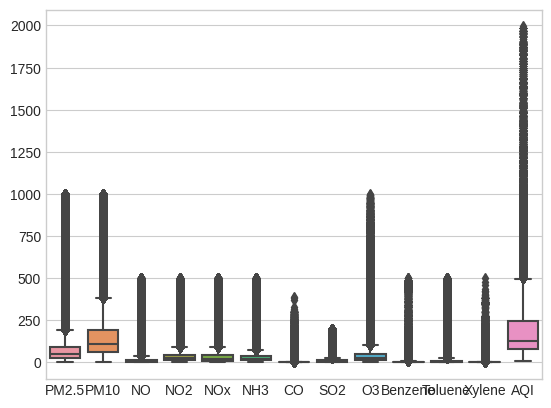

In [28]:
ax = sns.boxplot(data=df)

#### Looking at the pollutants and their distribution
From the plots, we can make the following observations:
 - PM2.5 and PM10 are major pollutants
 - CO is relatively low
 - most exhibited seasonality though further observations are required

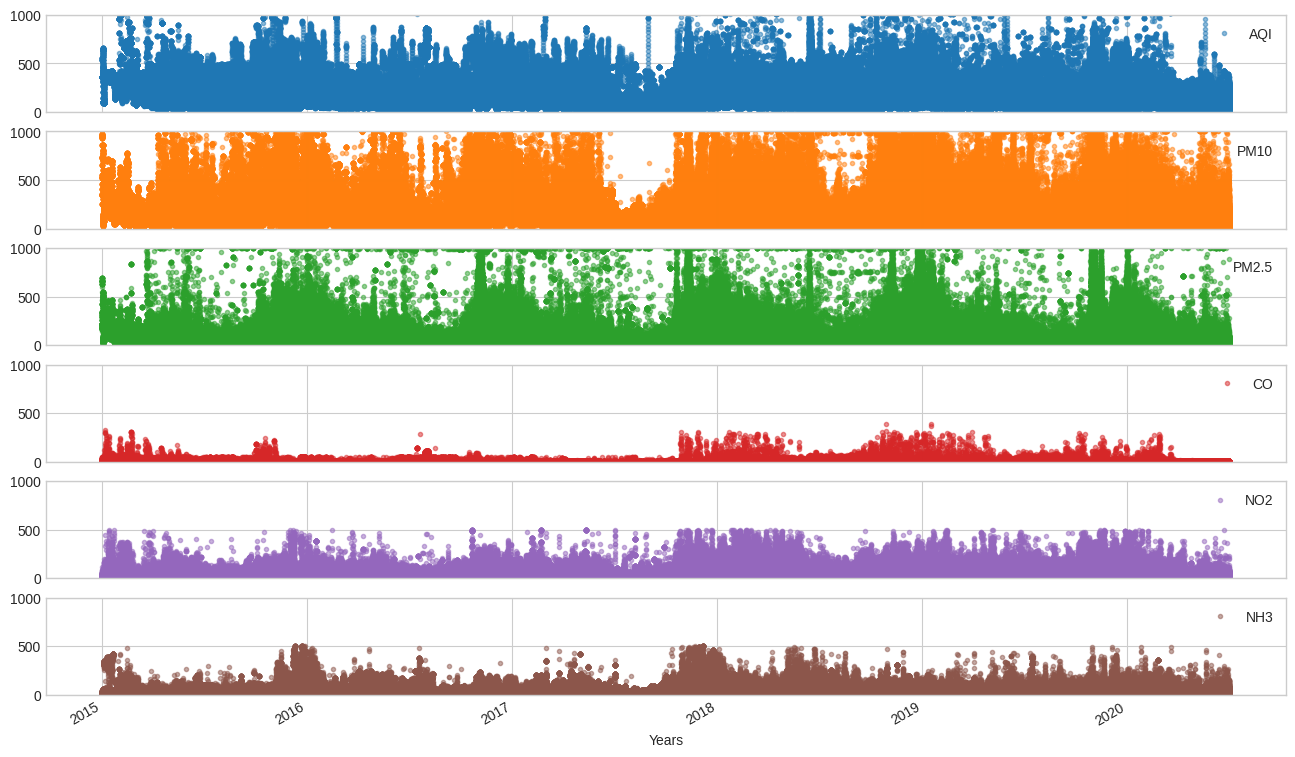

In [29]:
pollutants = ['AQI','PM10', 'PM2.5', 'CO', 'NO2','NH3']
axes = df[pollutants].plot(marker='.',alpha = 0.5, linestyle = 'None', figsize = (16,10), subplots = True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylim(0,1000)

Let's see the correllation of major pollutants.

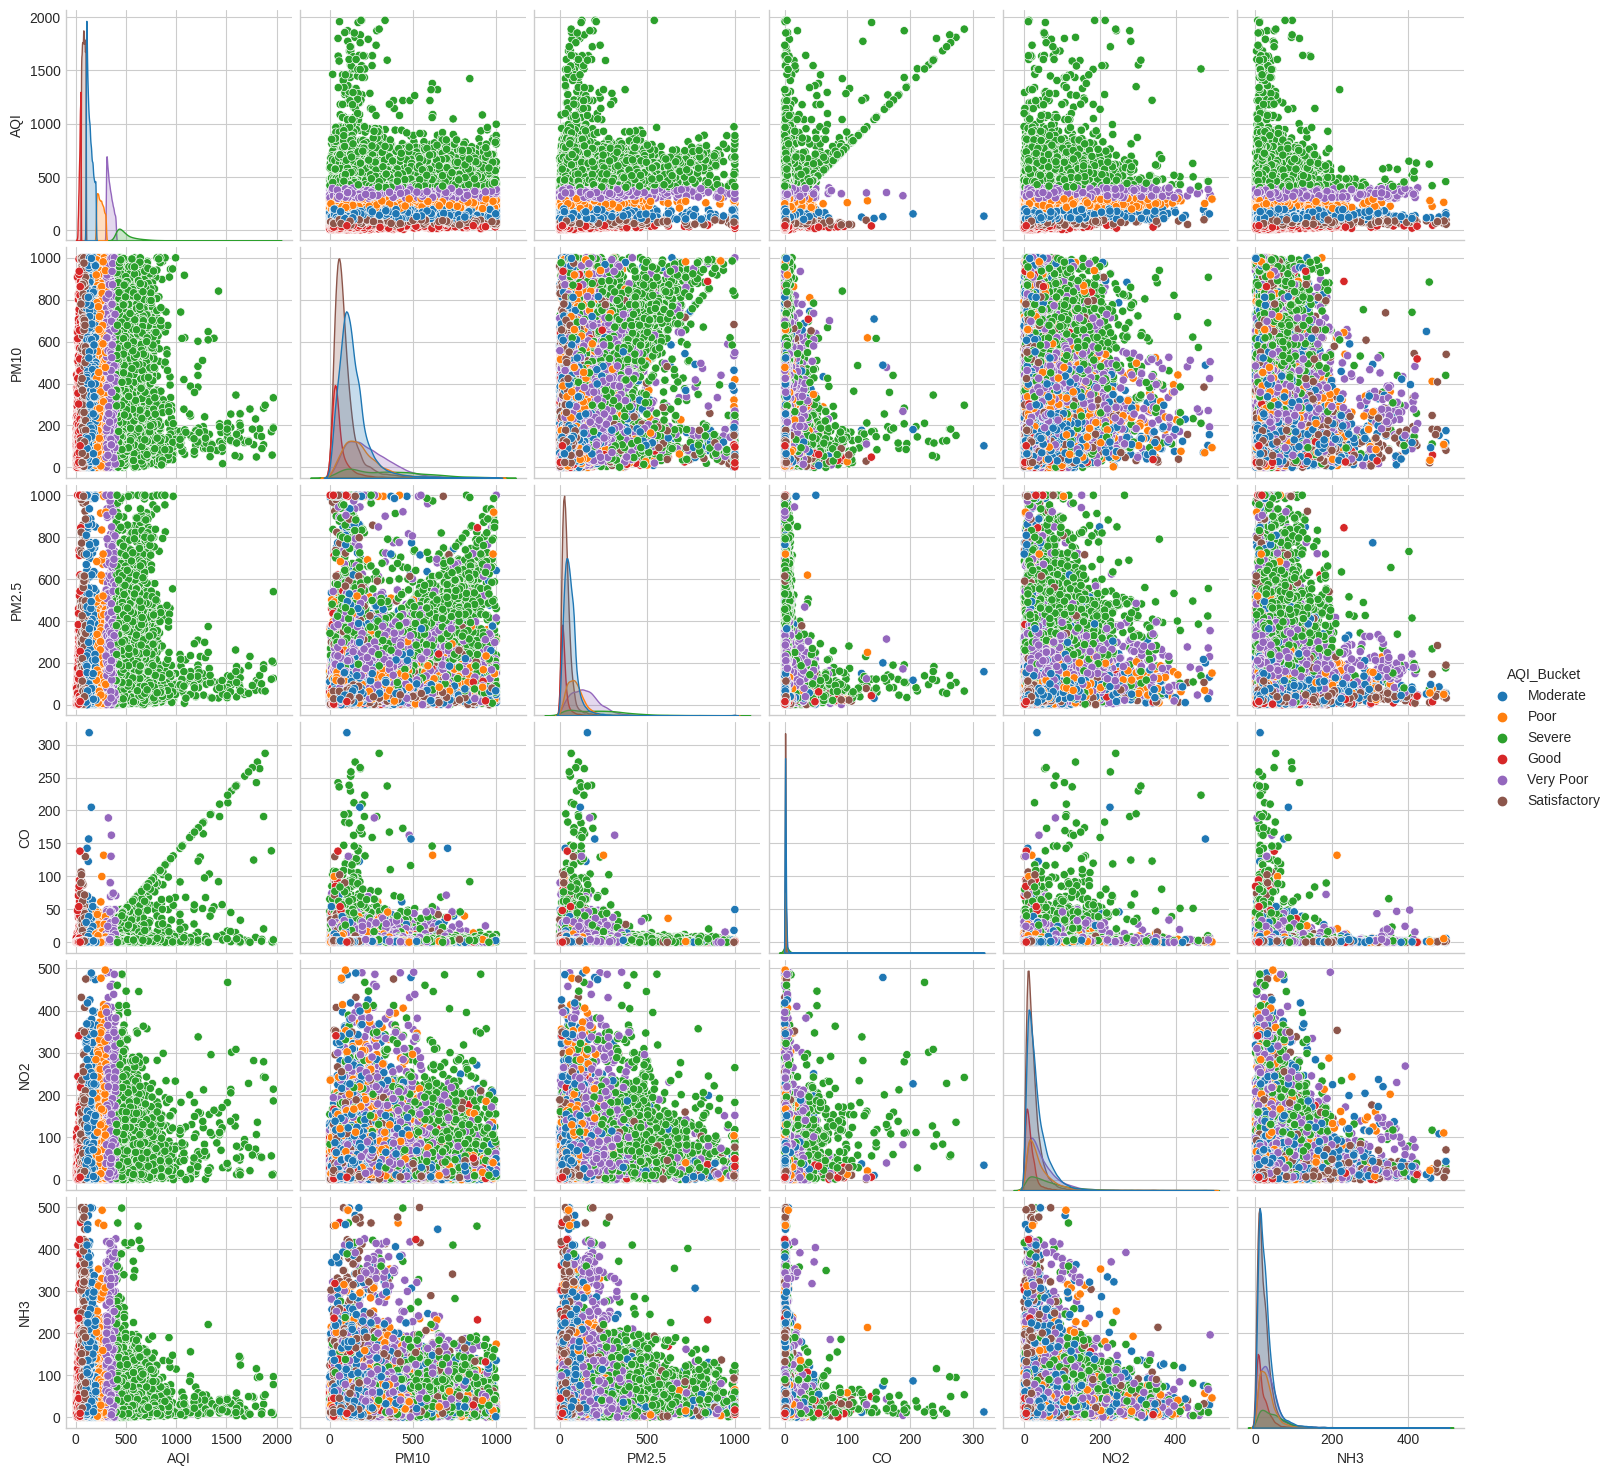

In [30]:
sns.pairplot(df.sample(frac=0.05).reset_index(), vars=pollutants, hue ='AQI_Bucket')

#### Now let's see the seasonality in the data
Let's convert the data into daily, weekly, and monthly versions.

In [31]:
def plot_(df, pollutants, stations):
    fig, ax = plt.subplots(3, 2, figsize=(16, 12), dpi=140)
    for ax1, pol in zip(ax.flat, pollutants):
        df[pol][stations].plot(title= pol, ax = ax1)
        ax1.legend();

In [32]:
st_pivoted = df.reset_index().pivot(index=['Datetime'], columns = 'StationId')
st_pivoted.fillna(method='bfill',inplace=True)

In [33]:
df1 = st_pivoted.copy()

In [34]:
df1 = df1.drop(['AQI_Bucket'], axis=1)

In [35]:
df1['Year'] = df1.index.year
df1['Month'] = df1.index.month
df1['Week']=df1.index.dayofweek
df1['Day'] = df1.index.day
df1['Hour'] = df1.index.hour

In [36]:
hour_day = df1.groupby(['Hour']).mean().ffill()
day_week = df1.groupby(['Week']).mean().ffill().reset_index()
month_year = df1.groupby(['Month']).mean().ffill().reset_index()

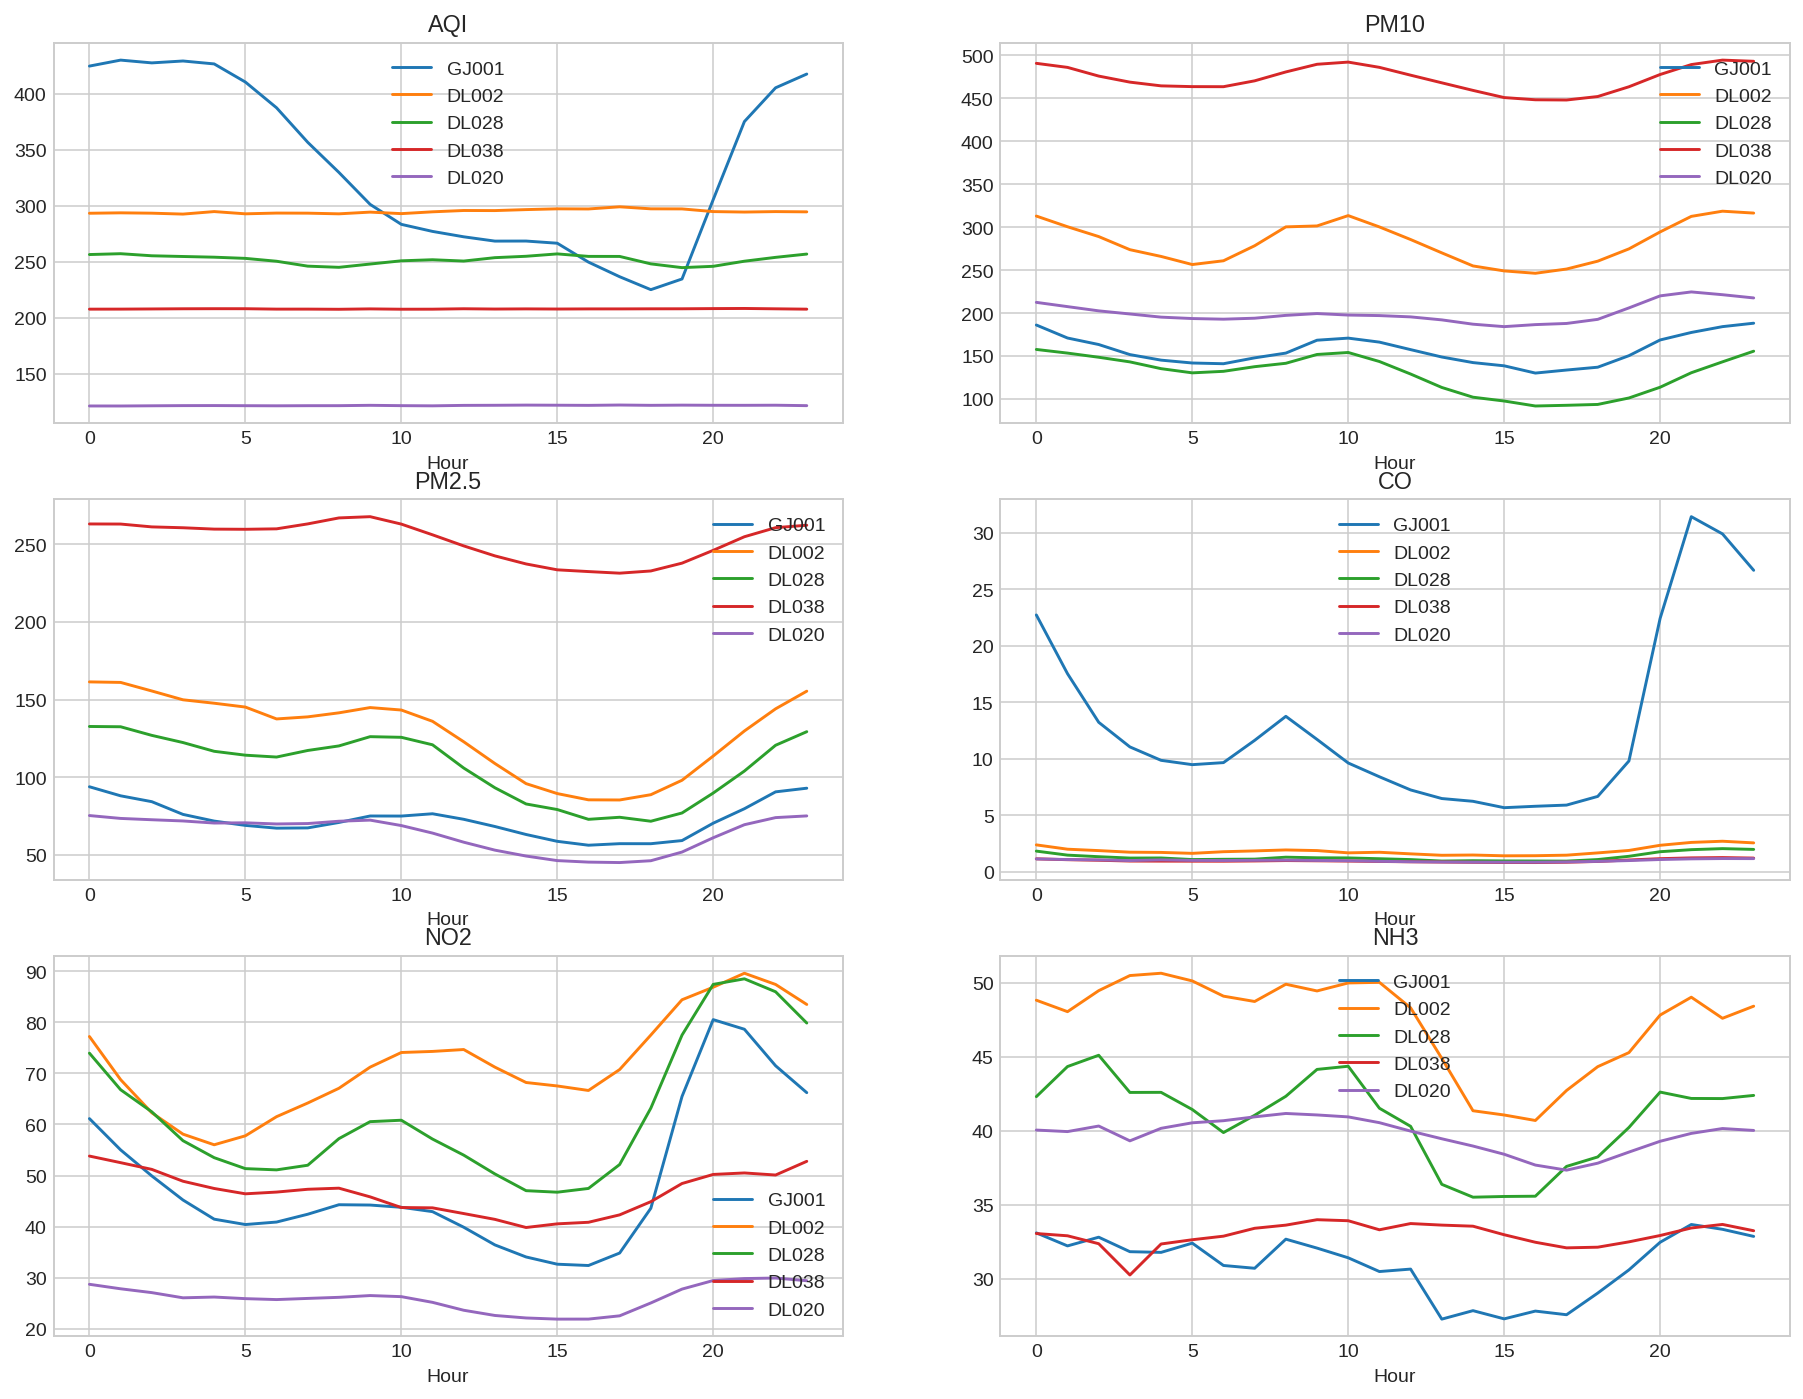

In [37]:
plot_(hour_day, pollutants, most_polluted.index)
#hour_day.plot(x="Hour", y=pollutants)

The concentration of pollutants exhibits a pattern throughout the day, with the lowest levels occurring around dawn and the highest levels around 10 o'clock. The average AQI remains constant, as expected based on its calculation method. Consequently, employing an hourly prediction window is not suitable in this scenario.

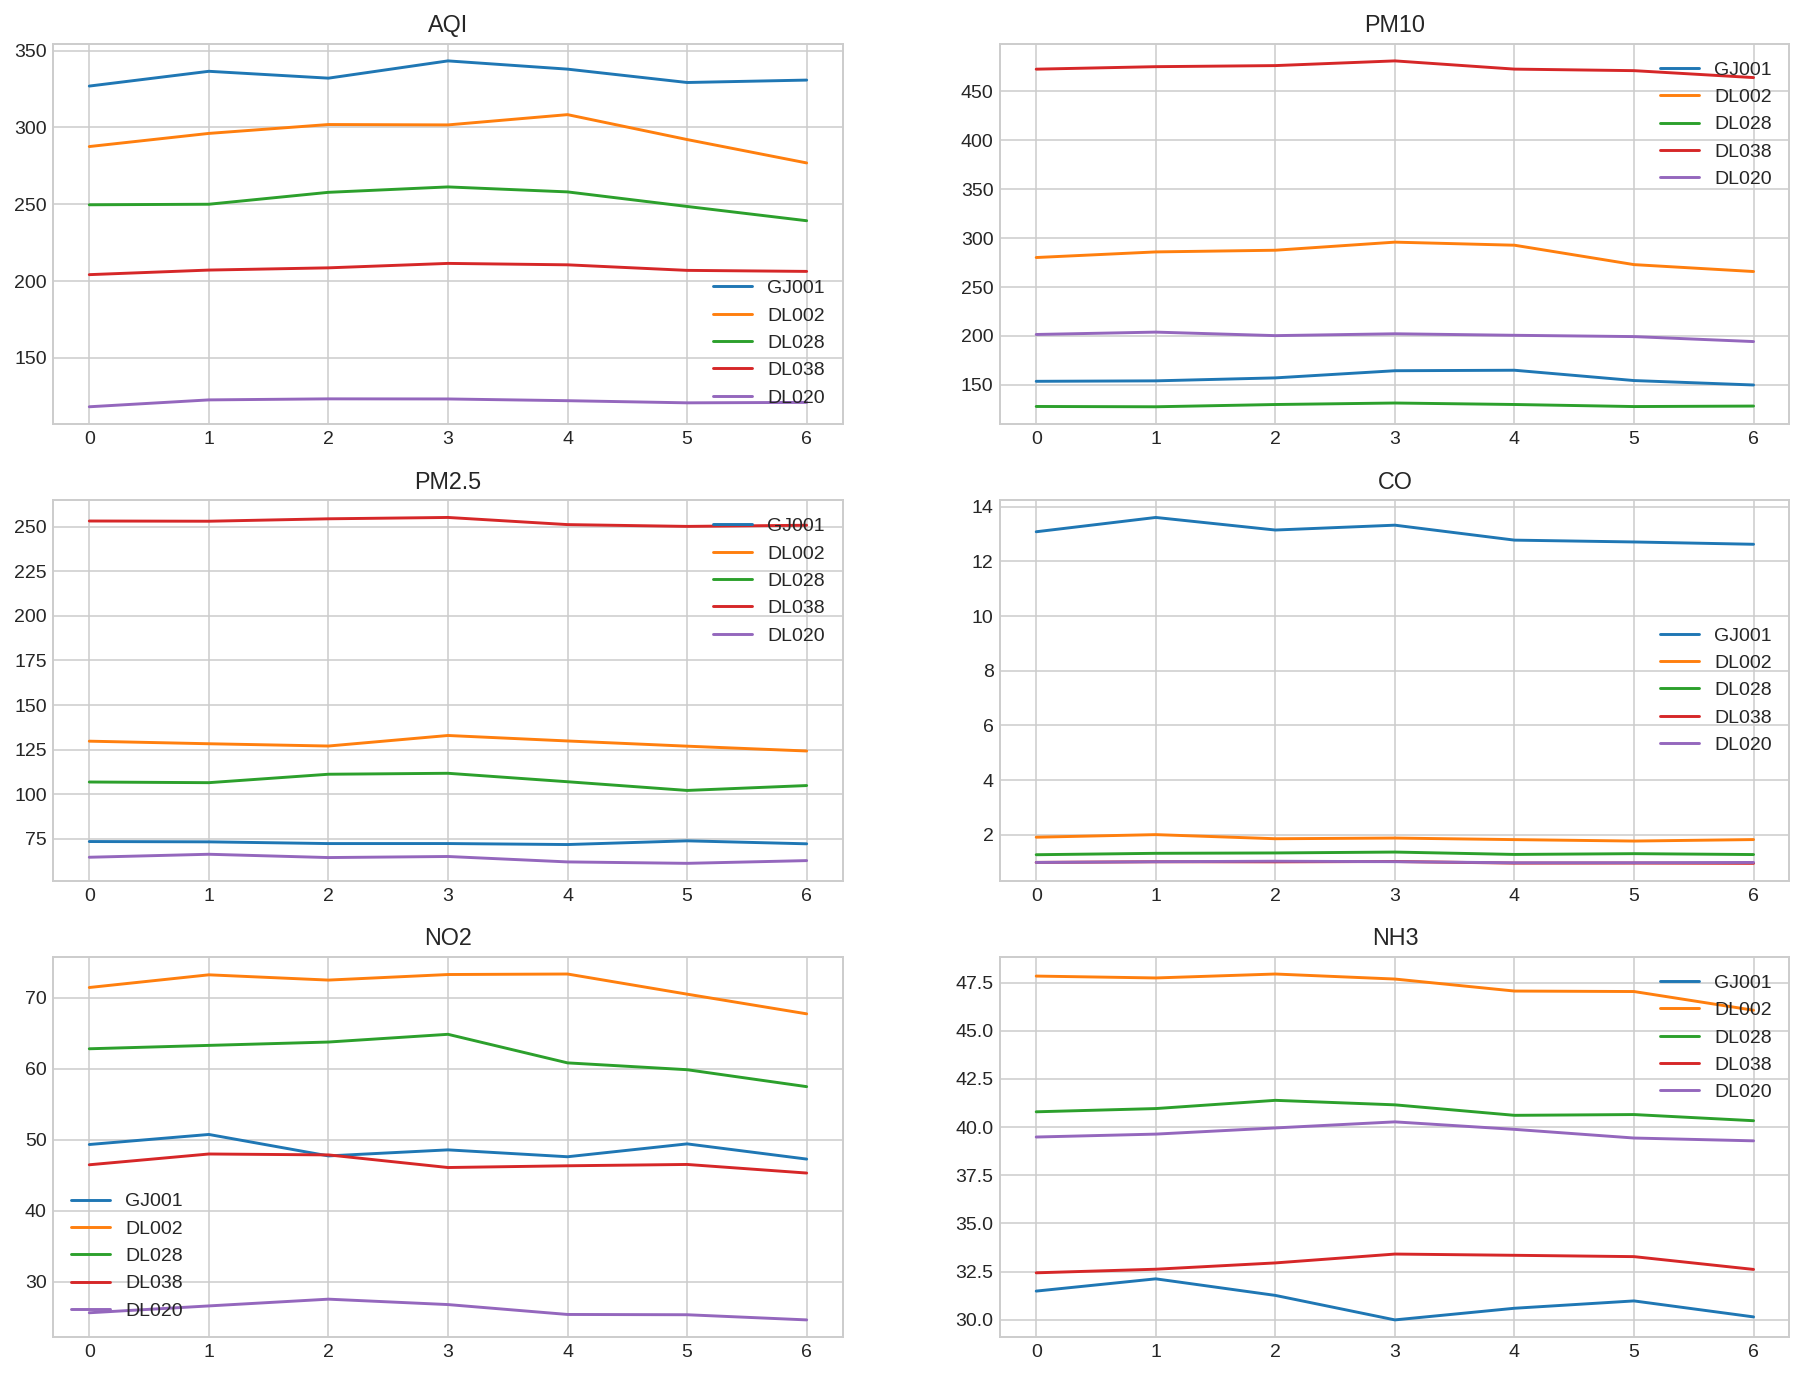

In [38]:
plot_(day_week, pollutants, most_polluted.index)

The pollution level is almost the same for each day of the week except showing a slight decrease during the weekends. This is expected because human activities are reduced during the weekends.

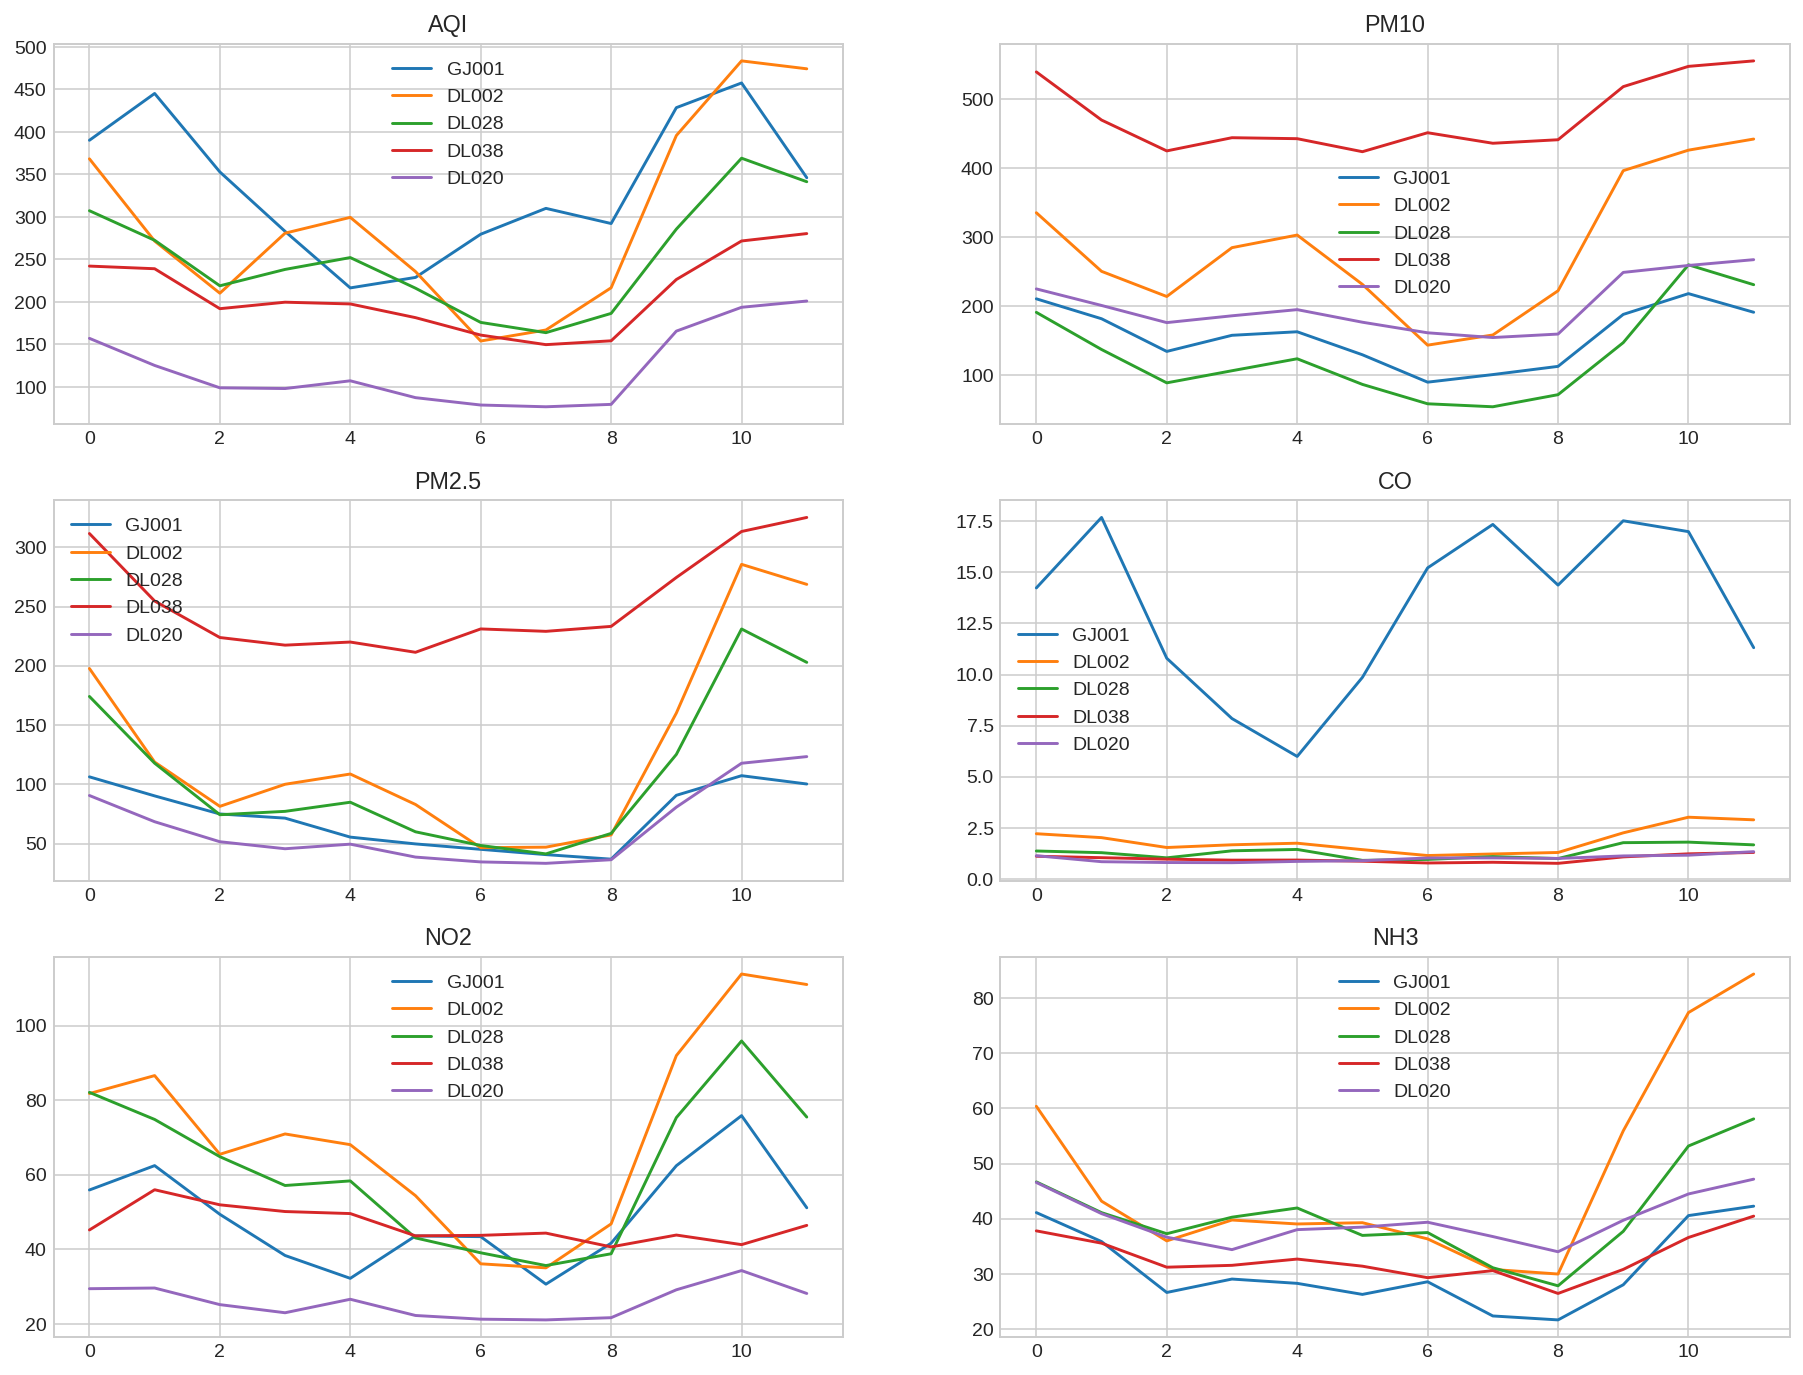

In [39]:
plot_(month_year, pollutants, most_polluted.index)

There is clearly a seasonality for most of pollutants. We can see that the level of pollutants decreases around summer and increasing in colder seasons. 

#### Trends in the data

In [40]:
daily = df1.resample('D').mean()
weekly = df1.resample('W').mean()

In [41]:
monthly = df1.resample('M').mean()
daily['AQI']

StationId        AP001       AP005       AS001       BR005       BR006   
Datetime                                                                 
2015-01-01  167.000000  403.000000  108.000000   90.000000  153.000000  \
2015-01-02  167.000000  403.000000  108.000000   90.000000  153.000000   
2015-01-03  167.000000  403.000000  108.000000   90.000000  153.000000   
2015-01-04  167.000000  403.000000  108.000000   90.000000  153.000000   
2015-01-05  167.000000  403.000000  108.000000   90.000000  153.000000   
...                ...         ...         ...         ...         ...   
2020-06-27   41.666667   40.666667   34.958333   65.875000   49.958333   
2020-06-28   49.333333   70.041667   36.250000  115.458333   84.750000   
2020-06-29   55.500000   68.208333   47.500000  197.625000   58.916667   
2020-06-30   60.750000   53.541667   38.625000  197.625000   82.416667   
2020-07-01   54.000000   50.000000   36.000000  198.000000  100.000000   

StationId        BR007       BR008       BR009       BR010      CH001  ...   
Datetime                                                               ...   
2015-01-01  107.000000  109.000000  109.000000  109.000000  58.000000  ...  \
2015-01-02  107.000000  109.000000  109.000000  109.000000  58.000000  ...   
2015-01-03  107.000000  109.000000  109.000000  109.000000  58.000000  ...   
2015-01-04  107.000000  109.000000  109.000000  109.000000  58.000000  ...   
2015-01-05  107.000000  109.000000  109.000000  109.000000  58.000000  ...   
...                ...         ...         ...         ...        ...  ...   
2020-06-27  109.833333   53.916667   56.958333   54.666667  79.208333  ...   
2020-06-28  105.541667   72.541667   53.041667   59.958333  73.000000  ...   
2020-06-29  113.083333   51.375000   57.166667   49.833333  83.000000  ...   
2020-06-30  109.875000   59.291667   61.875000   46.750000  70.916667  ...   
2020-07-01  105.000000   74.000000   67.000000   46.000000  66.000000  ...   

StationId        UP014  UP015       UP016      WB007      WB008       WB009   
Datetime                                                                      
2015-01-01  398.826087  153.0   68.000000  70.000000  47.000000  128.000000  \
2015-01-02  487.625000  153.0   68.000000  70.000000  47.000000  128.000000   
2015-01-03  141.041667  153.0   68.000000  70.000000  47.000000  128.000000   
2015-01-04  313.625000  153.0   68.000000  70.000000  47.000000  128.000000   
2015-01-05  323.916667  153.0   68.000000  70.000000  47.000000  128.000000   
...                ...    ...         ...        ...        ...         ...   
2020-06-27   74.125000    NaN   90.500000  28.250000  41.000000   43.208333   
2020-06-28   66.458333    NaN   76.750000  33.625000  64.208333   43.291667   
2020-06-29   73.333333    NaN   70.791667  34.333333  64.875000   45.833333   
2020-06-30   61.208333    NaN  103.333333  41.500000  50.125000   40.583333   
2020-07-01   66.000000    NaN  106.000000  30.000000  52.000000   38.000000   

StationId       WB010      WB011      WB012      WB013  
Datetime                                                
2015-01-01  87.000000  78.000000  57.000000  64.000000  
2015-01-02  87.000000  78.000000  57.000000  64.000000  
2015-01-03  87.000000  78.000000  57.000000  64.000000  
2015-01-04  87.000000  78.000000  57.000000  64.000000  
2015-01-05  87.000000  78.000000  57.000000  64.000000  
...               ...        ...        ...        ...  
2020-06-27  24.833333  48.125000  32.750000  49.833333  
2020-06-28  31.625000  48.041667  31.916667  65.291667  
2020-06-29  38.083333  68.583333  36.041667  63.041667  
2020-06-30  42.875000  59.666667  39.291667  56.541667  
2020-07-01  35.000000  62.000000  39.000000  59.000000  

[2009 rows x 110 columns]

Let's plot the daily, weekly and monthly AQI time series together over a single 12-month period to compare them.

Text(0.5, 0.98, 'AQI of most polluted stations')

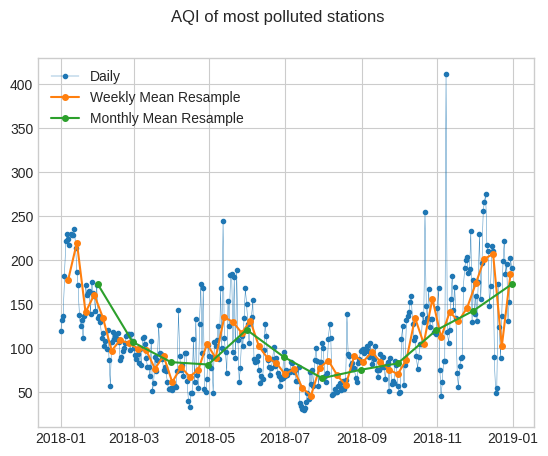

In [42]:
###### Start and end of the date range to extract
start, end = '2018-01', '2018-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(daily['AQI']['AP001'].loc[start:end], marker='.', linestyle='-', linewidth=0.3, label='Daily')
ax.plot(weekly['AQI']['AP001'].loc[start:end], marker='.', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(monthly['AQI']['AP001'].loc[start:end], marker='.', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.legend();
plt.suptitle('AQI of most polluted stations')

We can see that the weekly mean time series is smoother than the daily time series because higher frequency variability has been averaged out in the resampling.


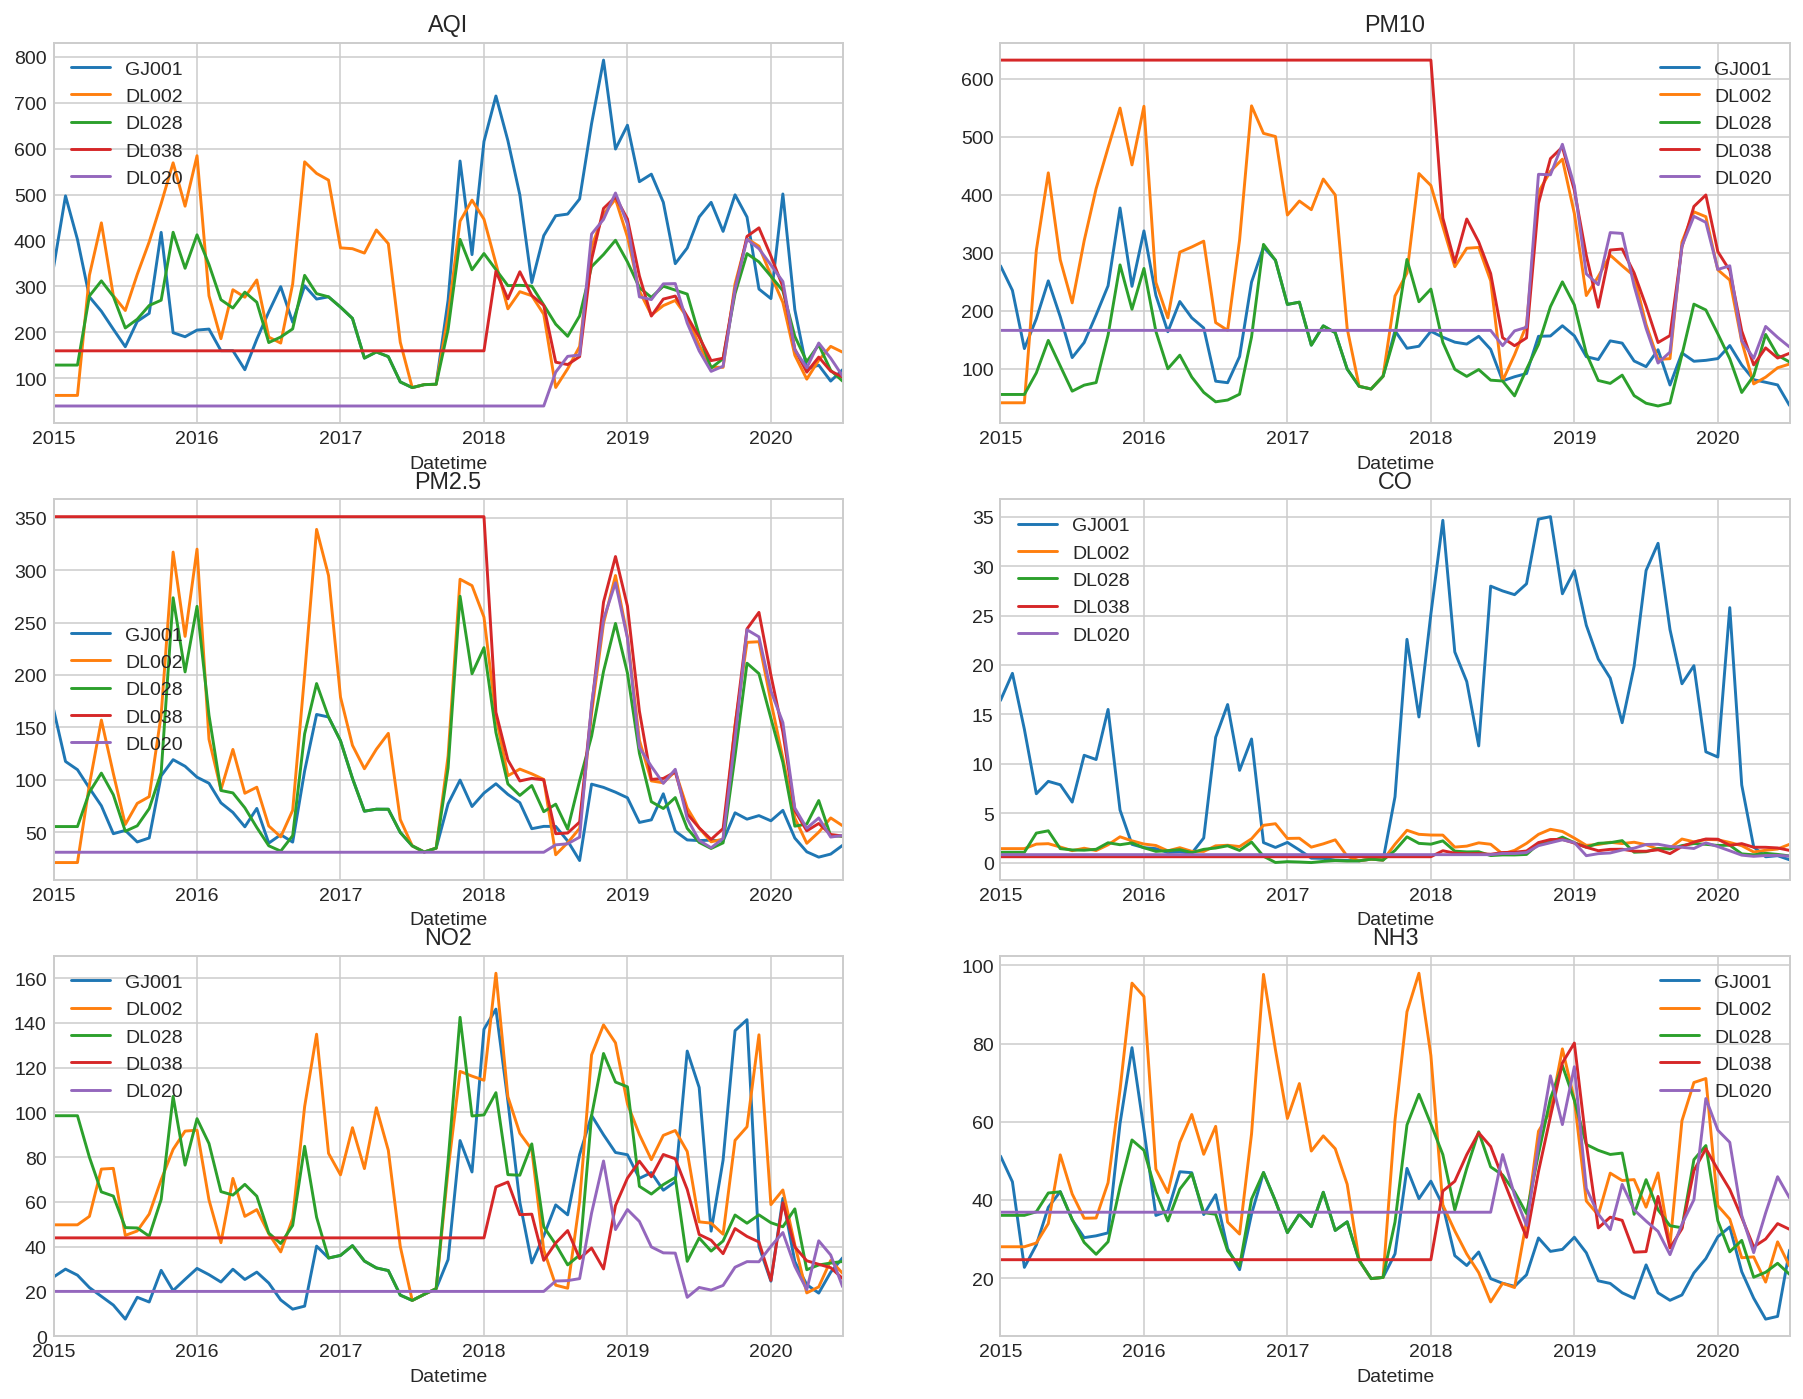

In [43]:
plot_(monthly, pollutants, most_polluted.index)

## 3. Feature Engineering

Let's work on one station from this point on. I selected station DL031 because contains least missing data (highest filled).

In [44]:
df_dl031 = st_pivoted.xs('DL031', axis=1, level='StationId')
df_dl031

PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2   
Datetime                                                                     
2015-01-01 01:00:00  59.67   39.17  5.83  41.58  46.47  41.97  0.33  13.53  \
2015-01-01 02:00:00  59.67   39.17  5.83  41.58  46.47  41.97  0.33  13.53   
2015-01-01 03:00:00  59.67   39.17  5.83  41.58  46.47  41.97  0.33  13.53   
2015-01-01 04:00:00  59.67   39.17  5.83  41.58  46.47  41.97  0.33  13.53   
2015-01-01 05:00:00  59.67   39.17  5.83  41.58  46.47  41.97  0.33  13.53   
...                    ...     ...   ...    ...    ...    ...   ...    ...   
2020-06-30 20:00:00  28.00   95.00  1.57  22.17  13.07  14.93  0.97  18.45   
2020-06-30 21:00:00  28.00   90.00  2.00  24.45  14.62  15.15  1.02  11.27   
2020-06-30 22:00:00  28.00   96.00  2.10  19.92  12.33  15.32  1.00   8.78   
2020-06-30 23:00:00  27.00   90.00  1.60  21.98  13.03  13.32  0.93   7.25   
2020-07-01 00:00:00  38.00  114.00  1.35  27.12  15.53  11.50  0.90   6.47   

                        O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
Datetime                                                                  
2015-01-01 01:00:00  79.50     1.61     7.09    0.33  63.0  Satisfactory  
2015-01-01 02:00:00  79.50     1.61     7.09    0.33  63.0  Satisfactory  
2015-01-01 03:00:00  79.50     1.61     7.09    0.33  63.0  Satisfactory  
2015-01-01 04:00:00  79.50     1.61     7.09    0.33  63.0  Satisfactory  
2015-01-01 05:00:00  79.50     1.61     7.09    0.33  63.0  Satisfactory  
...                    ...      ...      ...     ...   ...           ...  
2020-06-30 20:00:00  11.53     0.53    10.34    1.10  64.0  Satisfactory  
2020-06-30 21:00:00  10.25     0.00     6.68    0.00  67.0  Satisfactory  
2020-06-30 22:00:00  10.05     0.00     1.30    2.05  68.0  Satisfactory  
2020-06-30 23:00:00  10.57    32.34     1.62    0.75  70.0  Satisfactory  
2020-07-01 00:00:00   9.93     1.31     7.39    0.00  73.0  Satisfactory  

[48192 rows x 14 columns]

We need to resample to daily as stated above.

In [45]:
df_dl031.drop(['AQI_Bucket'], axis=1, inplace=True)
df_dl031 = df_dl031.resample('D').mean()
df_dl031

PM2.5        PM10        NO        NO2        NOx        NH3   
Datetime                                                                       
2015-01-01  59.670000   39.170000  5.830000  41.580000  46.470000  41.970000  \
2015-01-02  59.670000   39.170000  5.830000  41.580000  46.470000  41.970000   
2015-01-03  59.670000   39.170000  5.830000  41.580000  46.470000  41.970000   
2015-01-04  59.670000   39.170000  5.830000  41.580000  46.470000  41.970000   
2015-01-05  59.670000   39.170000  5.830000  41.580000  46.470000  41.970000   
...               ...         ...       ...        ...        ...        ...   
2020-06-27  34.857083  120.250000  4.296667  27.145417  17.950000  32.206667   
2020-06-28  72.500000  256.833333  8.958750  27.068750  21.697500  24.982917   
2020-06-29  36.875000  134.583333  6.433333  27.480000  19.866667  20.435000   
2020-06-30  21.583333   70.208333  2.358750  17.561250  11.272500  15.635833   
2020-07-01  38.000000  114.000000  1.350000  27.120000  15.530000  11.500000   

                  CO        SO2         O3   Benzene   Toluene    Xylene   
Datetime                                                                   
2015-01-01  0.330000  13.530000  79.500000  1.610000  7.090000  0.330000  \
2015-01-02  0.330000  13.530000  79.500000  1.610000  7.090000  0.330000   
2015-01-03  0.330000  13.530000  79.500000  1.610000  7.090000  0.330000   
2015-01-04  0.330000  13.530000  79.500000  1.610000  7.090000  0.330000   
2015-01-05  0.330000  13.530000  79.500000  1.610000  7.090000  0.330000   
...              ...        ...        ...       ...       ...       ...   
2020-06-27  0.744167  14.879583   8.052083  1.773750  3.309167  0.807917   
2020-06-28  0.829583  14.878333   8.670417  0.824167  3.220000  1.860000   
2020-06-29  0.760833  12.781667   9.255833  1.472917  3.797083  2.758750   
2020-06-30  0.802083  13.389583   9.726250  2.286667  3.758333  1.017917   
2020-07-01  0.900000   6.470000   9.930000  1.310000  7.390000  0.000000   

                   AQI  
Datetime                
2015-01-01   63.000000  
2015-01-02   63.000000  
2015-01-03   63.000000  
2015-01-04   63.000000  
2015-01-05   63.000000  
...                ...  
2020-06-27   90.416667  
2020-06-28  155.000000  
2020-06-29  182.041667  
2020-06-30   88.708333  
2020-07-01   73.000000  

[2009 rows x 13 columns]

We will create some features based on our EDA above. Our earlier analysis has shown seasonality in during the time of the day, weekday/weekend, month and year.

Therefore, we will add new features Season, Year, Month, Part_of_Day, Is_Weekend to reflect the above.

In [46]:
df_dl031['Year'] = df_dl031.index.year
df_dl031['Month'] = df_dl031.index.month
df_dl031['Day'] = df_dl031.index.day
df_dl031['Hour'] = df_dl031.index.hour

Following the [indian season names](https://en.wikipedia.org/wiki/Climate_of_India), the following code creates a column 'Season'

In [47]:
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'pre-monsoon', 
               4: 'pre-monsoon',
               5: 'pre-monsoon',
               6: 'Monsoon',
               7: 'Monsoon',
               8: 'Monsoon',
               9: 'Monsoon',
               10: 'Post-monsoon',
               11: 'Post-monsoon',
               12: 'Post-monsoon'}
df_dl031['Season'] = df_dl031['Month'].apply(lambda x: season_dict[x])

In [48]:
def part_of_day(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )

In [49]:
df_dl031['Part_of_Day'] = df_dl031['Hour'].apply(lambda x: part_of_day(x))


In [50]:
df_dl031["Is_Weekend"] = df_dl031.index.dayofweek > 4
df_dl031

PM2.5        PM10        NO        NO2        NOx        NH3   
Datetime                                                                       
2015-01-01  59.670000   39.170000  5.830000  41.580000  46.470000  41.970000  \
2015-01-02  59.670000   39.170000  5.830000  41.580000  46.470000  41.970000   
2015-01-03  59.670000   39.170000  5.830000  41.580000  46.470000  41.970000   
2015-01-04  59.670000   39.170000  5.830000  41.580000  46.470000  41.970000   
2015-01-05  59.670000   39.170000  5.830000  41.580000  46.470000  41.970000   
...               ...         ...       ...        ...        ...        ...   
2020-06-27  34.857083  120.250000  4.296667  27.145417  17.950000  32.206667   
2020-06-28  72.500000  256.833333  8.958750  27.068750  21.697500  24.982917   
2020-06-29  36.875000  134.583333  6.433333  27.480000  19.866667  20.435000   
2020-06-30  21.583333   70.208333  2.358750  17.561250  11.272500  15.635833   
2020-07-01  38.000000  114.000000  1.350000  27.120000  15.530000  11.500000   

                  CO        SO2         O3   Benzene   Toluene    Xylene   
Datetime                                                                   
2015-01-01  0.330000  13.530000  79.500000  1.610000  7.090000  0.330000  \
2015-01-02  0.330000  13.530000  79.500000  1.610000  7.090000  0.330000   
2015-01-03  0.330000  13.530000  79.500000  1.610000  7.090000  0.330000   
2015-01-04  0.330000  13.530000  79.500000  1.610000  7.090000  0.330000   
2015-01-05  0.330000  13.530000  79.500000  1.610000  7.090000  0.330000   
...              ...        ...        ...       ...       ...       ...   
2020-06-27  0.744167  14.879583   8.052083  1.773750  3.309167  0.807917   
2020-06-28  0.829583  14.878333   8.670417  0.824167  3.220000  1.860000   
2020-06-29  0.760833  12.781667   9.255833  1.472917  3.797083  2.758750   
2020-06-30  0.802083  13.389583   9.726250  2.286667  3.758333  1.017917   
2020-07-01  0.900000   6.470000   9.930000  1.310000  7.390000  0.000000   

                   AQI  Year  Month  Day  Hour   Season Part_of_Day   
Datetime                                                              
2015-01-01   63.000000  2015      1    1     0   Winter       night  \
2015-01-02   63.000000  2015      1    2     0   Winter       night   
2015-01-03   63.000000  2015      1    3     0   Winter       night   
2015-01-04   63.000000  2015      1    4     0   Winter       night   
2015-01-05   63.000000  2015      1    5     0   Winter       night   
...                ...   ...    ...  ...   ...      ...         ...   
2020-06-27   90.416667  2020      6   27     0  Monsoon       night   
2020-06-28  155.000000  2020      6   28     0  Monsoon       night   
2020-06-29  182.041667  2020      6   29     0  Monsoon       night   
2020-06-30   88.708333  2020      6   30     0  Monsoon       night   
2020-07-01   73.000000  2020      7    1     0  Monsoon       night   

            Is_Weekend  
Datetime                
2015-01-01       False  
2015-01-02       False  
2015-01-03        True  
2015-01-04        True  
2015-01-05       False  
...                ...  
2020-06-27        True  
2020-06-28        True  
2020-06-29       False  
2020-06-30       False  
2020-07-01       False  

[2009 rows x 20 columns]

## 4. Forcasting

We want to predict the AQI index then infer AQI_Bucket based on AQI as we did above.

Let's have a quick look at the data.

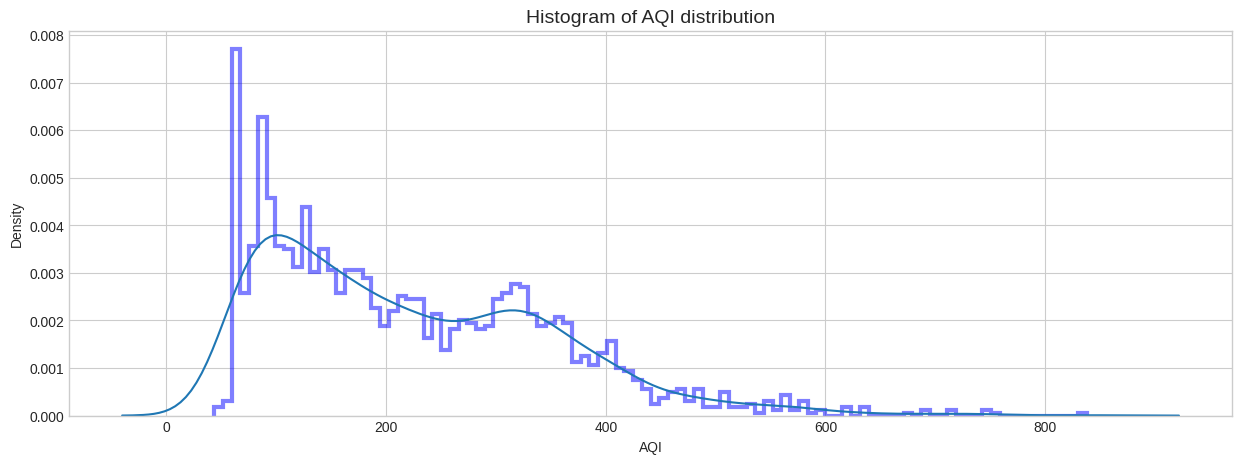

In [51]:
plt.figure(figsize = (15,5))
plot = sns.distplot(df_dl031['AQI'],bins = 100, hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 0.5, "color": "blue"});
plot.set_title('Histogram of AQI distribution', fontsize = 14); 

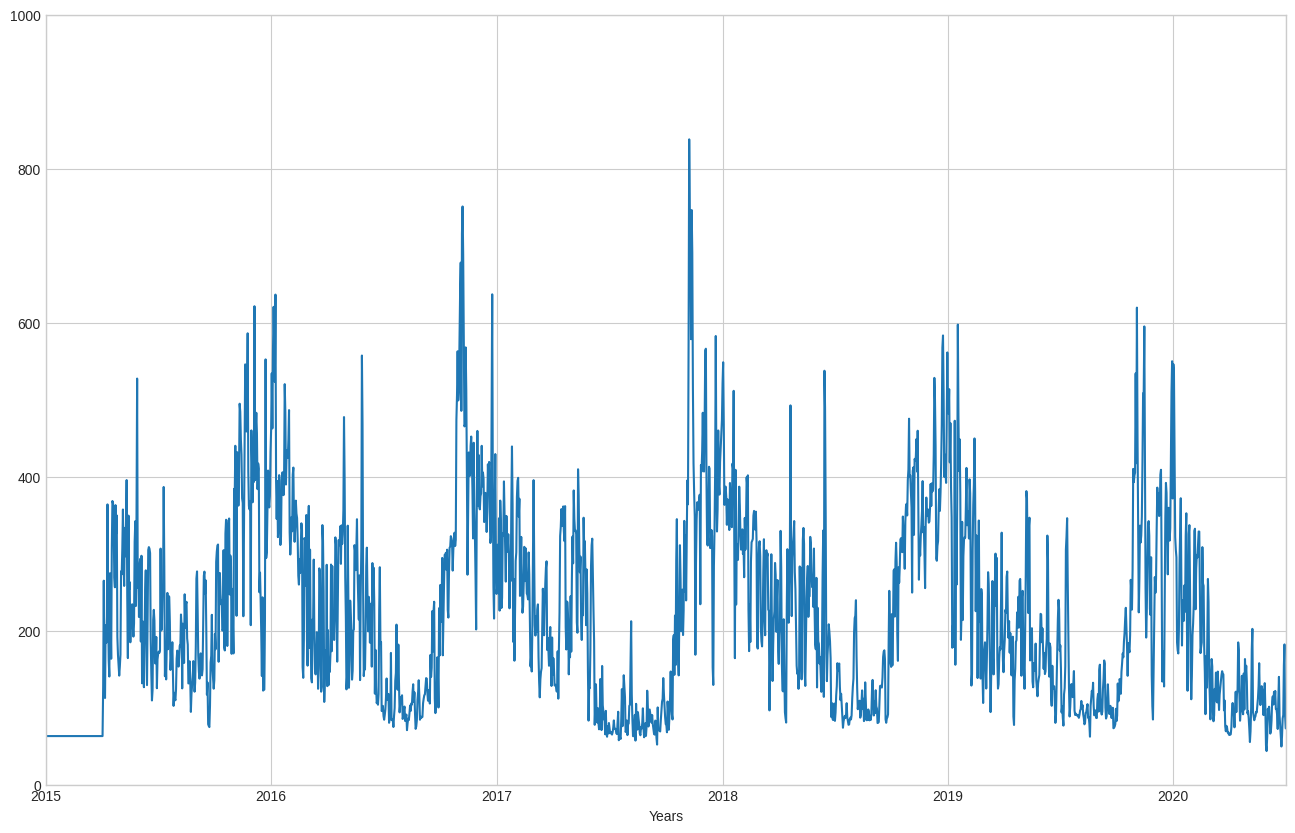

In [52]:
#how the aqi has changed overtime
axes = df_dl031['AQI'].plot( figsize = (16,10), subplots = True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylim(0,1000)


Let's check the stationality of the data.

In [53]:
from statsmodels.tsa.stattools import adfuller
def test_adfuller(df, field):
    results = adfuller(df[field],)
    print('This is the adfuller statistic:%.3f'%(results[0]))
    print('This is the p_value: %.5f' % (results[1])) 
    print('The Critical Values for each probability:\n')
    for key, value in results[4].items():
        print('%s: %.3f'%(key, value))
    if (results[0]) < list(results[4].values())[0] :
        print('This data is a Stationary dataset!')
    else:
        print('This is a non_stationary dataset!')

test_adfuller(df_dl031, 'AQI')

This is the adfuller statistic:-3.657
This is the p_value: 0.00476
The Critical Values for each probability:

1%: -3.434
5%: -2.863
10%: -2.568
This data is a Stationary dataset!


Here the data is stationary. 

since we have a stationary model, we can use statistical models like auto regression and ARIMA. But first let's get a base line model by predicting one step ahead (one day ahead).

In [54]:
shifted = pd.concat([df_dl031.AQI, df_dl031.AQI.shift(1)], axis = 1).reset_index()
shifted.columns = ['Date', 'actual', 'pred']
shifted.head(3)

Date  actual  pred
0 2015-01-01    63.0   NaN
1 2015-01-02    63.0  63.0
2 2015-01-03    63.0  63.0

In [55]:
shifted.corr()

Date    actual      pred
Date    1.000000 -0.053577 -0.052633
actual -0.053577  1.000000  0.876632
pred   -0.052633  0.876632  1.000000

In [56]:
from sklearn.metrics import mean_squared_error
base_error_1 = mean_squared_error(shifted[1:].actual, shifted[1:].pred)
print(base_error_1)

4040.81502981131


There is 87.66% precent correlation between each day's index and the previous day's index. So it can be a good method to predict each day based on previous. The mean squared error of the base model is 4040.81.

Here is the auto-correlation plot. It shows us how much we can depend on each of the previous indices.Each line is representing the correlation of Y(t-n) to Y(t) and the more it is in the blue area, the more certain we are that it actually has this correlation most of the time


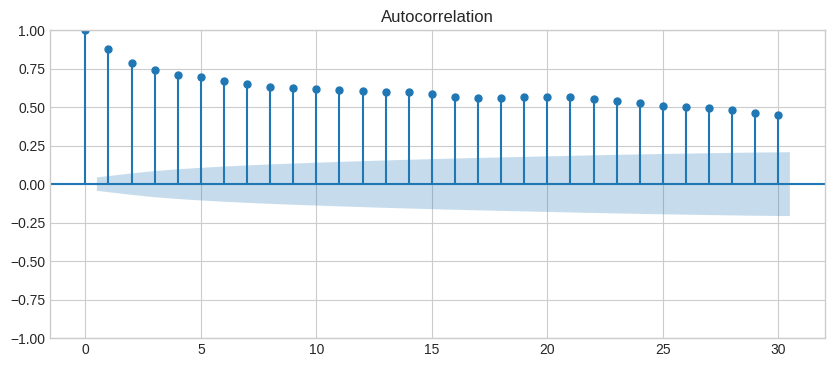

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
N = 30
fig, ax_ = plt.subplots( figsize = (10,4))
plot_acf(df_dl031.AQI, lags = N, alpha = 0.05, use_vlines = True, ax = ax_ )
fig.show()

### Auto Regression Model
An autoreg model combines different previous records. To make sure what is the best N for our autoregression equation,let's try out different numbers and take the one with lowest error.

In [58]:
from statsmodels.tsa.ar_model import AutoReg

N = 100
train, test = df_dl031.AQI[:-20], df_dl031.AQI[-20:]

model = AutoReg(train, lags = 1, trend = 'c')
fitted_model = model.fit()
y_pred_autoreg = fitted_model.predict(start = list(test.index)[0],
                                    end = list(test.index)[-1],
                                    dynamic = False)
error = mean_squared_error(test, y_pred_autoreg)
best_n = 0
trend = 'c'

for n in range(1, N):
    for trend in ['n', 'c', 't', 'ct']:
        model = AutoReg(train, lags = n, seasonal=False, trend = trend, period = 365)
        fitted_model = model.fit()
        y_pred_autoreg = fitted_model.predict(start = list(test.index)[0],
                                                  end = list(test.index)[-1],
                                                  dynamic = False)
        mse = mean_squared_error(test, y_pred_autoreg)
        if error > mse:
            error = mse
            best_n = n
            trend_ = trend
print("Best n is", best_n)
print("mse", mse)
print("trend", trend)

Best n is 10
mse 2099.883460056623
trend ct


Let's use the parameter's to fit the model

In [59]:
df_dl031.reset_index()
train = df_dl031.AQI

model = AutoReg(train, lags = best_n, seasonal = False, period = 365, trend = trend)
fitted_model = model.fit()
y_pred_autoreg = fitted_model.predict(start = list(train.index)[0],
                                      end = list(train.index)[-1],
                                      dynamic = False)
df_dl031['Autocorr'] = y_pred_autoreg

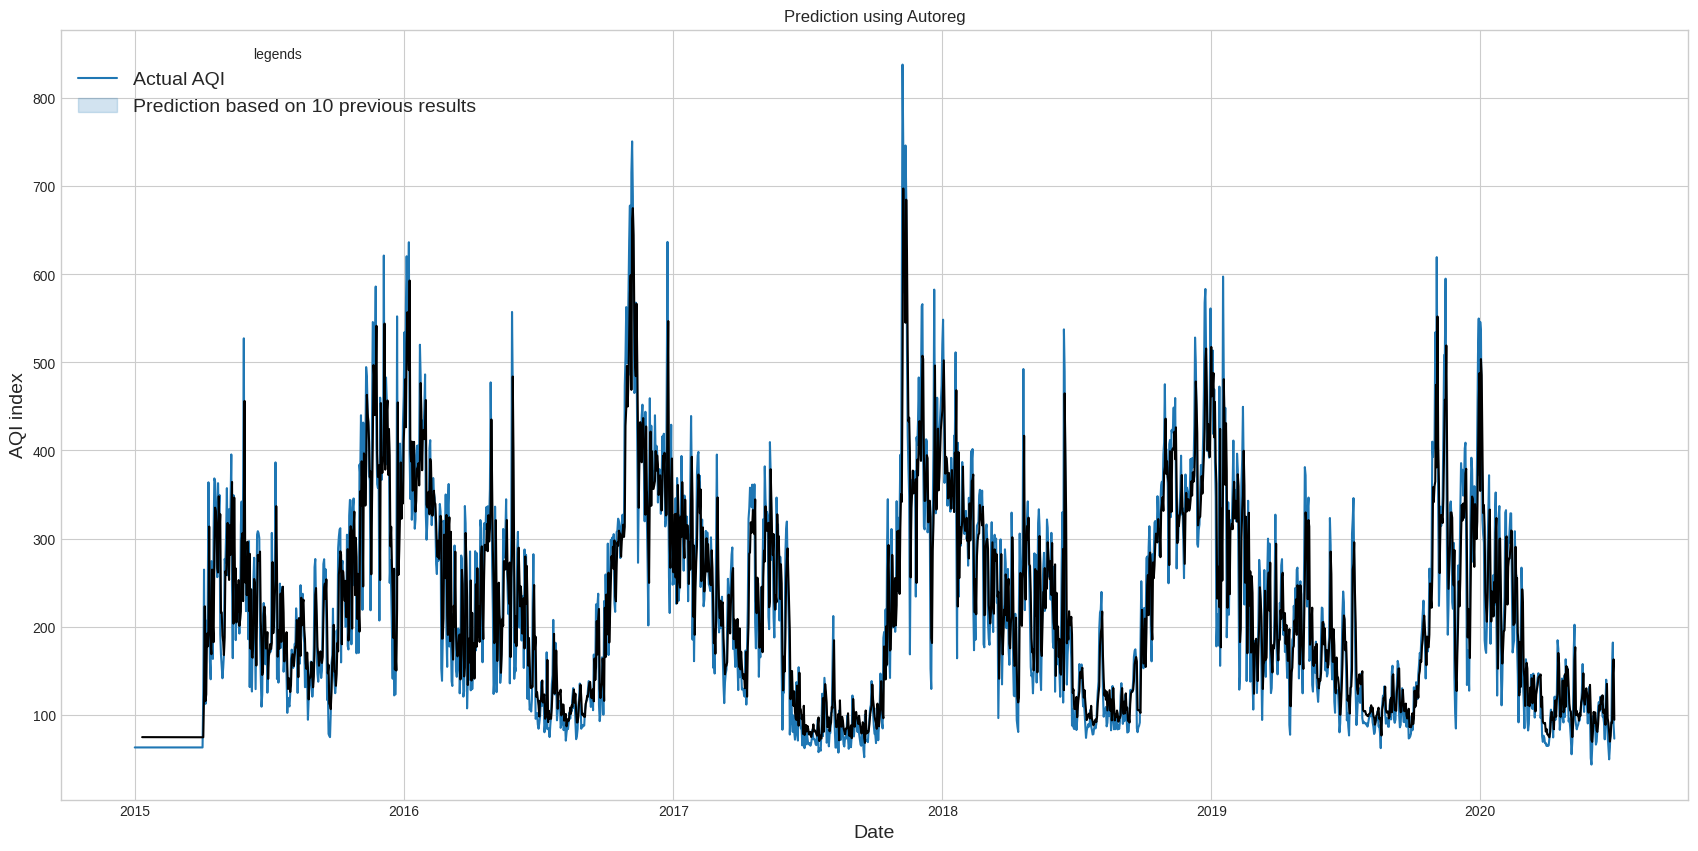

In [60]:
plt.figure(figsize = (21,10))

sns.lineplot(df_dl031.AQI, sort = False)

plot = sns.lineplot(
             df_dl031.Autocorr, 
              color = 'black')

plot.legend(title='legends', loc='upper left',
           labels=['Actual AQI', 'Prediction based on '+str(best_n)+' previous results'], fontsize = 14)


plot.set_ylabel('AQI index', fontsize = 14);
plot.set_xlabel('Date', fontsize = 14);
plot.set_title('Prediction using Autoreg');

### ARIMA

One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for Auto Regressive Integrated Moving Average. ARIMA is a model that can be fitted to time series data to predict future points in the series.

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [62]:
model = auto_arima(y= df_dl031['AQI'],start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=False, m=30)

In [63]:
model = ARIMA(df_dl031.AQI, order=model.order)  
results_ARIMA = model.fit() 


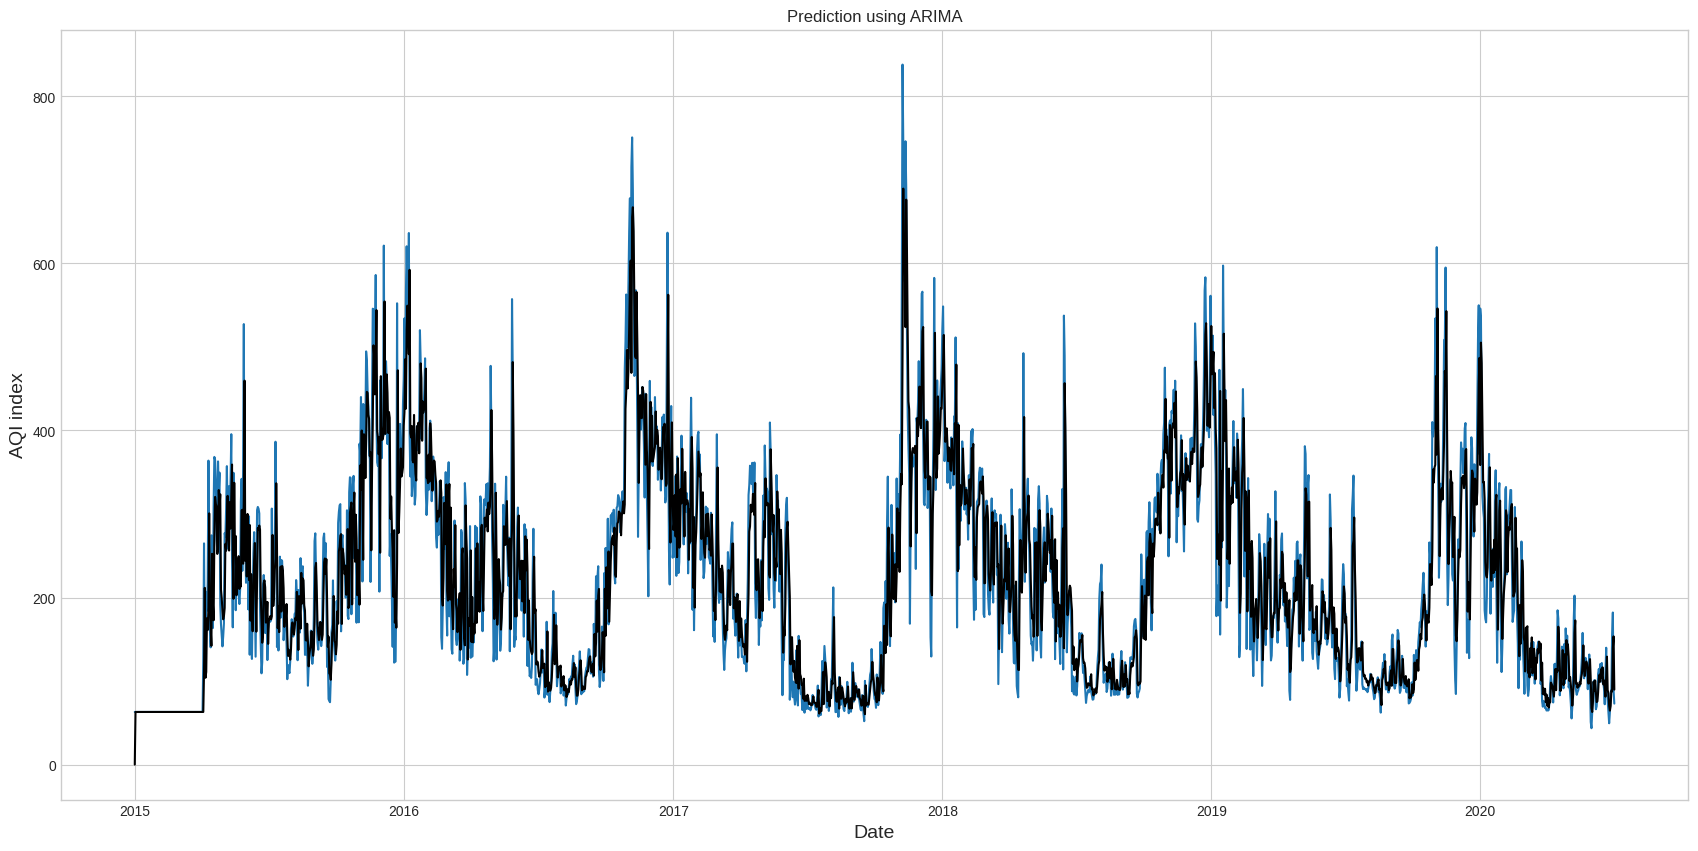

In [64]:
plt.figure(figsize = (21,10))

sns.lineplot(df_dl031.AQI, sort = False)

plot = sns.lineplot(
             results_ARIMA.fittedvalues, 
              color = 'black')
plot.set_ylabel('AQI index', fontsize = 14);
plot.set_xlabel('Date', fontsize = 14);
plot.set_title('Prediction using ARIMA');

count    2009.000000
mean        0.089816
std        59.603545
min      -291.631446
25%       -27.935801
50%        -0.094606
75%        26.663992
max       398.171864
dtype: float64


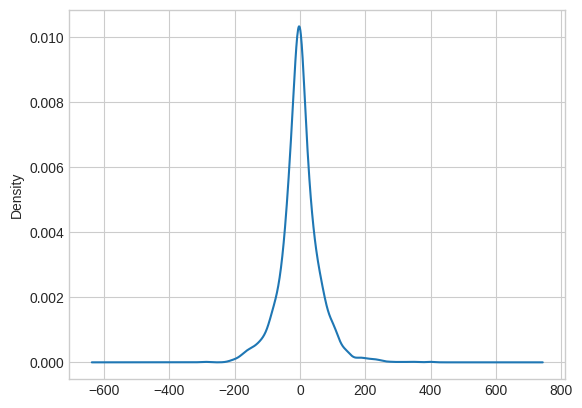

In [65]:
residuals = results_ARIMA.resid
residuals.plot(kind='kde')
print(residuals.describe())

In [66]:
import joblib
joblib.dump(model, "model/arima_model.pkl")

['model/arima_model.pkl']